In [ ]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from angiofsde import *


Simulation time: 5.74786 seconds
Simulation time: 1.61012 seconds


Text(0.5, 0, 'X [a.u.]')

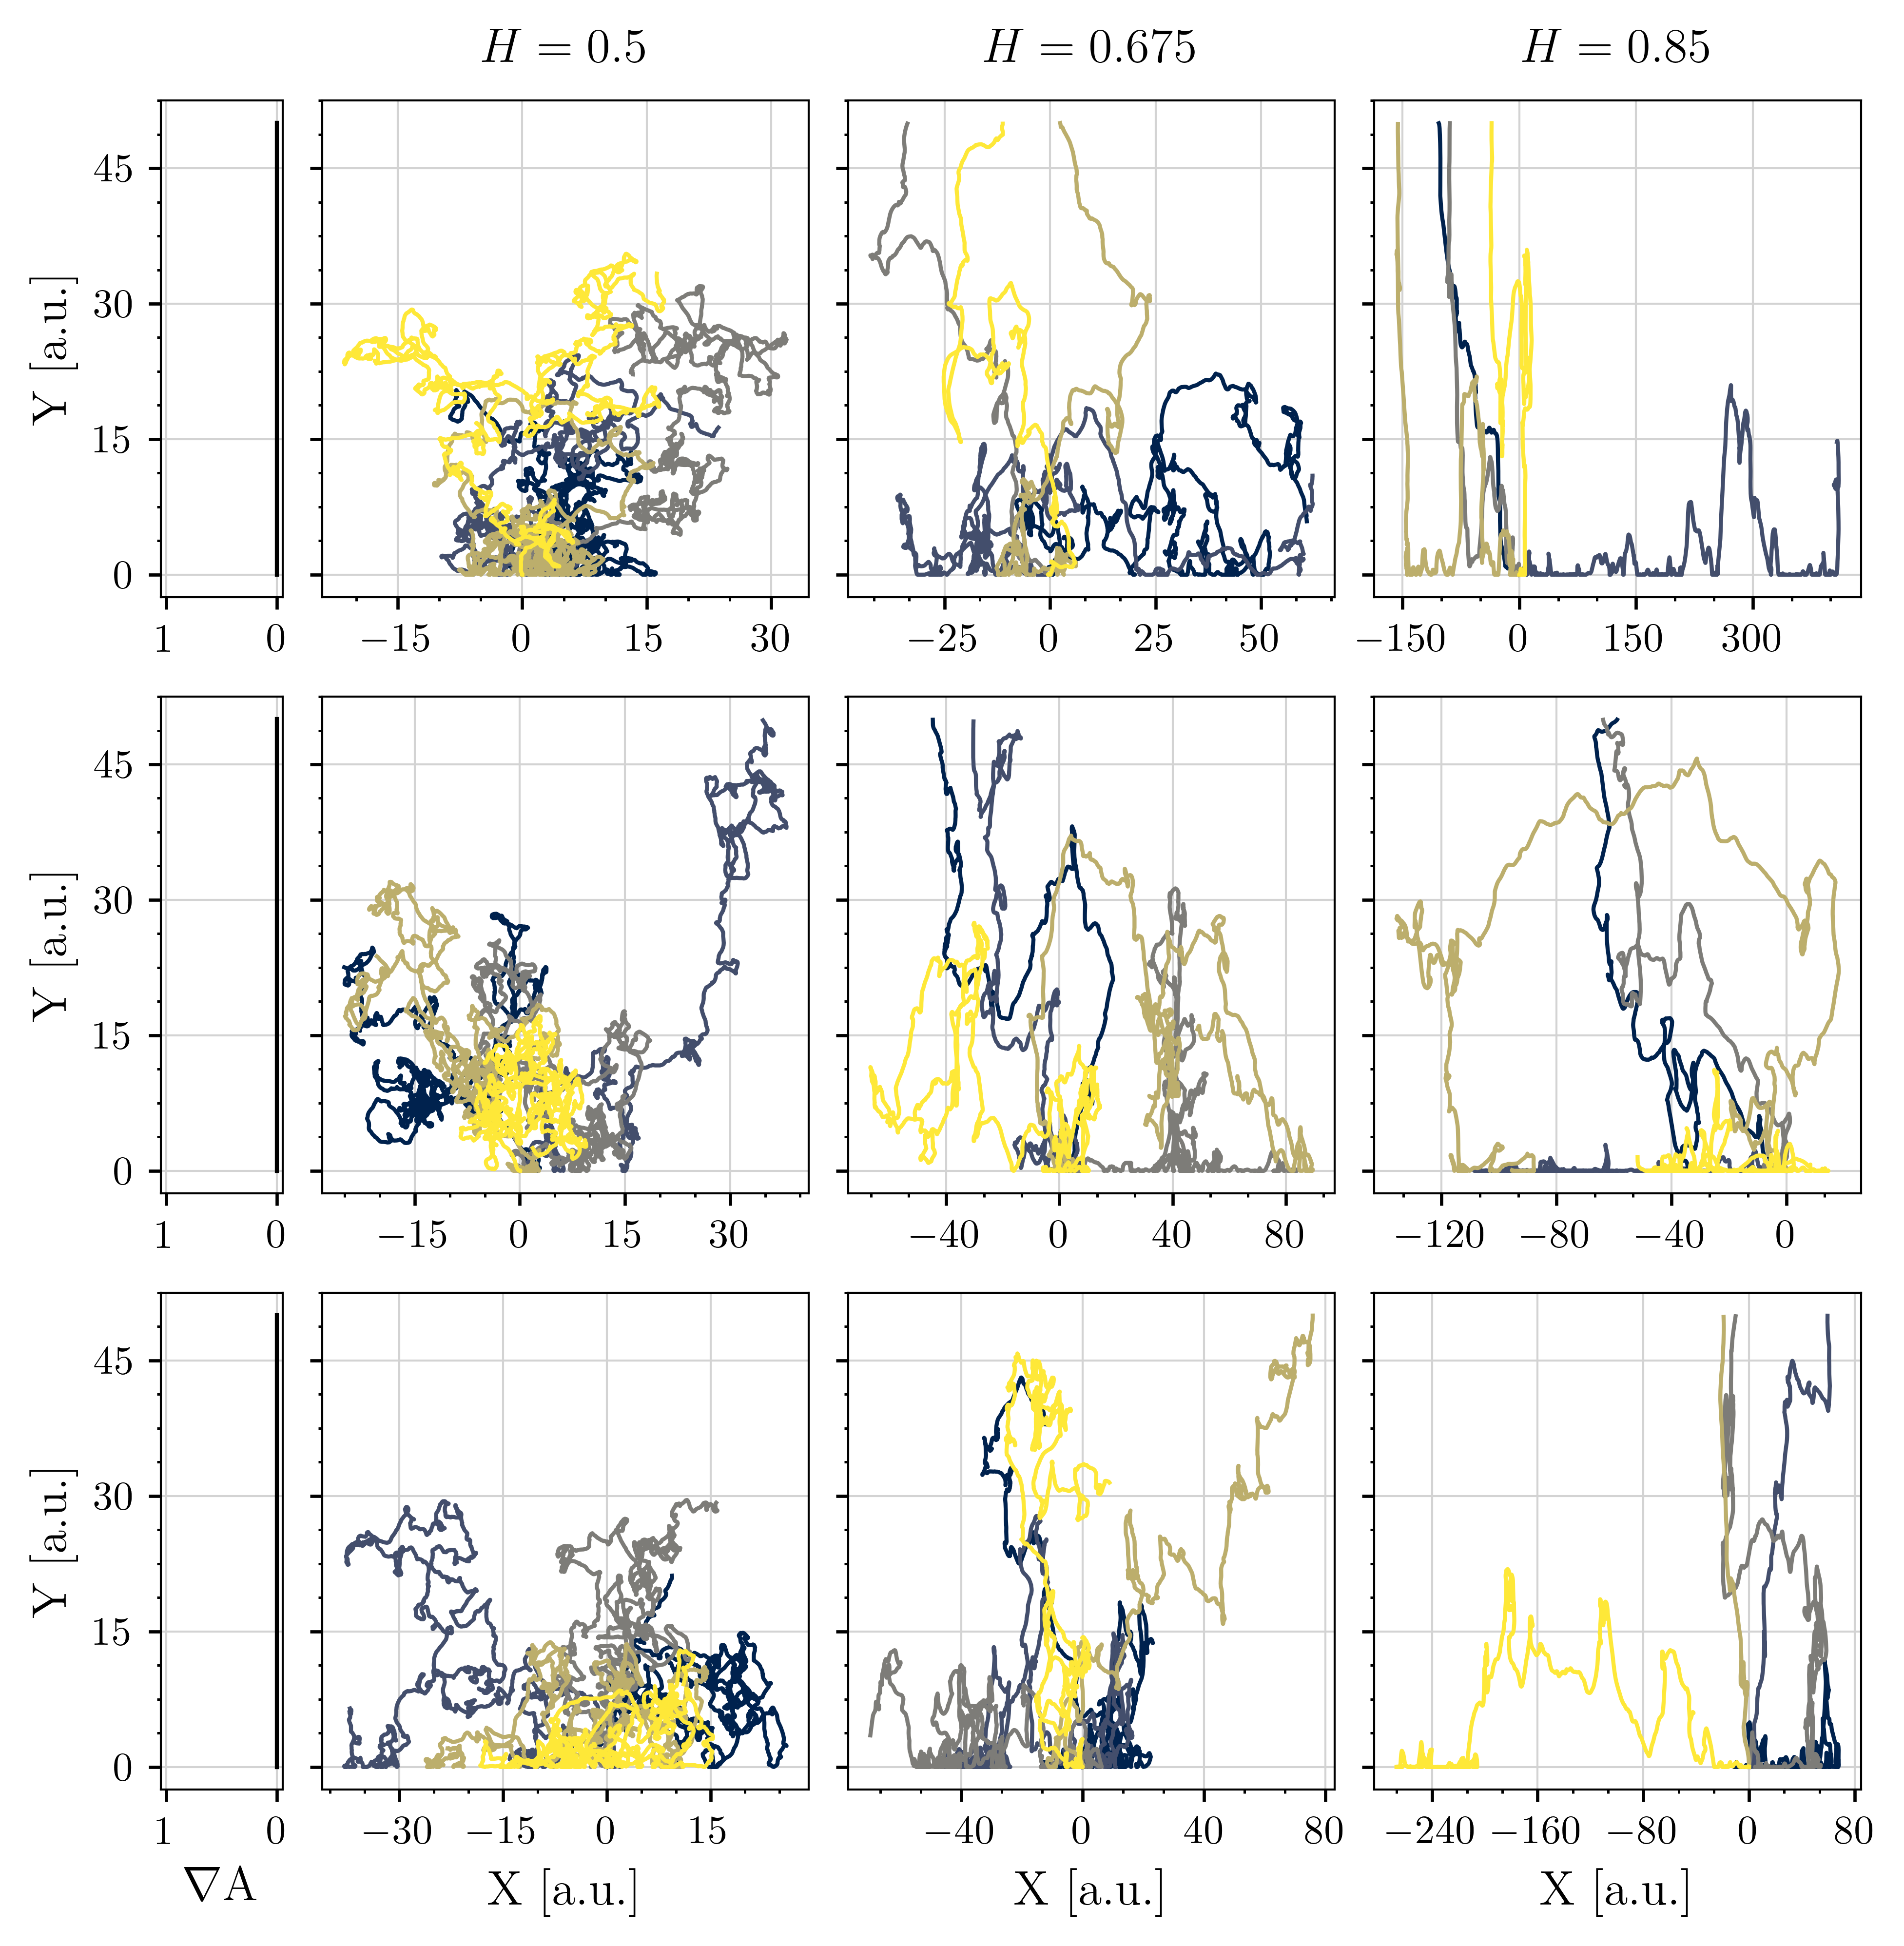

In [3]:
class ZeroGradient(Gradient):
    """
    Constant gradient class.
    This class represents a constant gradient in the y-direction.
    """
    def __init__(self, a0):
        super().__init__(a0)

    def calculate_gradient(self, x):
        """
        Calculate the gradient at a given point.
        Parameters
        ----------
        x: array-like
            The coordinates at which to calculate the gradient.
            The first element is the x-coordinate, and the second element is the y-coordinate.
        Returns
        -------
        x_grad: float
            The x-component of the gradient.
        y_grad: float
            The y-component of the gradient.

        """
        x_grad = 0
        y_grad = 0

        return np.array([x_grad, y_grad])

n_reps = 5
# Hurst_index = 0.5
n_steps = 5_000
dtau = .1
delta = 1  # Done: review the delta effect over the simulation
mode = 'Simulate'
wall = 50
linear_gradient = LinearGradient(0.1, [0, wall], wall)
constant_gradient = ConstantGradient(0.1)
exponential_gradient = ExponentialGradient(0.1, [0, wall], wall)

figures = {

}
list_H = [0.5, 0.675, 0.85]
zero_gradient = ZeroGradient(0.1)

time_start = time.time()
warmup_eigenvalues(list_H, n_steps)
for h in list_H:
    A_sim = AngioSimulation(n_reps, h, n_steps, dtau, delta,
                        xa=[0, wall],
                        mode="Simulate",
                        wall=wall, 
                        # only_ht=True, 
                        Grad=zero_gradient)
    A_sim.simulate(n_jobs=10)
    # if figures['exp'] is None:
    h = str(h).split(".")[1]
    key = f"exp0{h}"
    tray = A_sim.get_trajectories()
    figures[key] = tray
    
time_stop = time.time()
print(f"Simulation time: {time_stop - time_start:.5f} seconds")

n_reps = 5
# Hurst_index = 0.5
n_steps = 5_000
dtau = .1
delta = 1  # Done: review the delta effect over the simulation
mode = 'Simulate'
wall = 50
linear_gradient = LinearGradient(0.1, [0, wall], wall)
constant_gradient = ConstantGradient(0.1)
exponential_gradient = ExponentialGradient(0.1, [0, wall], wall)
zero_gradient = ZeroGradient(0.1)

# for h in list_H:
# TODO: Recoletar basura
# TODO: Recoletar basura
time_start = time.time()
list_H = [0.5, 0.675, 0.85]
warmup_eigenvalues(list_H, n_steps)
for h in list_H:
    A_sim = AngioSimulation(n_reps, h, n_steps, dtau, delta,
                        xa=[0, wall],
                        mode="Simulate",
                        wall=wall, 
                        # only_ht=True, 
                        Grad=zero_gradient)
    A_sim.simulate(n_jobs=10)
    # if figures['exp'] is None:
    h = str(h).split(".")[1]
    key = f"lin0{h}"
    tray = A_sim.get_trajectories()
    figures[key] = tray
time_stop = time.time()
print(f"Simulation time: {time_stop - time_start:.5f} seconds")

n_reps = 5
# Hurst_index = 0.5
n_steps = 5_000
dtau = .1
delta = 1  # Done: review the delta effect over the simulation
mode = 'Simulate'
wall = 50
linear_gradient = LinearGradient(0.1, [0, wall], wall)
constant_gradient = ConstantGradient(0.1)
exponential_gradient = ExponentialGradient(0.1, [0, wall], wall)

# for h in list_H:
# TODO: Recoletar basura
# TODO: Recoletar basura

list_H = [0.5, 0.675, 0.85]

for h in list_H:
    A_sim = AngioSimulation(n_reps, h, n_steps, dtau, delta,
                        xa=[0, wall],
                        mode="Simulate",
                        wall=wall, 
                        # only_ht=True, 
                        Grad=zero_gradient)
    A_sim.simulate(n_jobs=10)
    # if figures['exp'] is None:
    h = str(h).split(".")[1]
    key = f"con0{h}"
    tray = A_sim.get_trajectories()
    figures[key] = tray

import os
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import ticker


#%% Plot contstant gradient
plt.rcParams.update({
    # Font and text
    "font.size": 12,
    "font.family": "serif",
    # "font.sans-serif": ["DejaVu Sans"],
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 10,

    "ytick.labelsize": 10,
    "text.usetex":True,
    # Axes and grid
    "axes.edgecolor": "black",
    "axes.linewidth": 0.5,
    "axes.grid": False,
    "grid.color": "lightgray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,

    # Ticks
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.minor.size": 1,
    "ytick.minor.size": 1,
    # Figure
    # "figure.figsize": (10, 6),
    # "figure.dpi": 100,
    # Lines
    "lines.linewidth": 2,
    "lines.markersize": 6,
    # Savefig
    "savefig.dpi": 600,
    "savefig.transparent": True,
})
# for rep in figures['exp05']:
fig, ax = plt.subplot_mosaic(
    [['con_plot', 'con05', 'con0675', 'con085'],
    ['lin_plot', 'lin05', 'lin0675', 'lin085'],
    ['exp_plot', 'exp05', 'exp0675', 'exp085']],
   figsize=(7.5, 7.5),
   dpi = 600,
   gridspec_kw={'hspace': 0.2, 'wspace': 0.1,
                  'height_ratios': [1, 1, 1],
                  'width_ratios': [0.25, 1, 1, 1]},
   sharey=True,
    
)

keys = [ 'con05', 'con0675', 'con085', 'exp05', 'exp0675', 'exp085', 'lin05', 'lin0675', 'lin085']
norm = mcolors.Normalize(vmin=0, vmax= 4)
cmap = plt.cm.cividis
for key in keys:
    for i, rep in enumerate(figures[key]):
        ax[key].plot(rep.T[0], rep.T[1], linewidth = 1, color = cmap(norm(i)), zorder = 3)
        
y = np.linspace(0, 50, 100)

grads_const = [zero_gradient.calculate_gradient([0, x])[1] for x in y]

grads_exp = [zero_gradient.calculate_gradient([0, x])[1] for x in y]

grads_lin = [zero_gradient.calculate_gradient([0, x])[1] for x in y]

ax['con_plot'].plot(grads_const, y, color = 'black', linewidth = 1)
ax['con_plot'].set_xticks([0, 1.0])
ax['con_plot'].set_xlim([-0.05, 1.05])
# ax['con_plot'].set_xlabel(r'$\nabla \phi$')
ax['con_plot'].set_ylabel(r'Y [a.u.]')
ax['con_plot'].invert_xaxis()
ax['lin_plot'].plot(grads_lin, y, color = 'black', linewidth = 1, )
ax['lin_plot'].set_xticks([0, 1.0])
ax['lin_plot'].set_xlim([-0.05, 1.05])

ax['lin_plot'].set_ylabel(r'Y [a.u.]')
ax['lin_plot'].invert_xaxis()
ax['exp_plot'].plot(grads_exp, y, color = 'black', linewidth = 1)
ax['exp_plot'].set_xticks([0, 1.0])
ax['exp_plot'].set_xlim([-0.05, 1.05])
ax['exp_plot'].set_ylabel(r'Y [a.u.]')
ax['exp_plot'].set_xlabel(r'$\nabla \mathrm{A}$')
ax['exp_plot'].invert_xaxis()

for key in keys:
    ax[key].xaxis.set_major_locator(ticker.MaxNLocator(5))
    ax[key].xaxis.set_minor_locator(ticker.AutoMinorLocator(3))
    ax[key].yaxis.set_major_locator(ticker.MaxNLocator(5))
    ax[key].yaxis.set_minor_locator(ticker.AutoMinorLocator(4))
    
for a in ax.values():
    a.grid(which='major', color='lightgray', linestyle='-', linewidth=0.5, zorder = 0)

ax['con05'].annotate(r'$H=0.5$', xy=(0.5, 1.1),
            xycoords='axes fraction', ha='center', va='center',
            fontsize=12, color = 'black', zorder = 4)

ax['con0675'].annotate(r'$H=0.675$', xy=(0.5, 1.1),
            xycoords='axes fraction', ha='center', va='center',
            fontsize=12, color = 'black', zorder = 4)
ax['con085'].annotate(r'$H=0.85$', xy=(0.5, 1.1),
            xycoords='axes fraction', ha='center', va='center',
            fontsize=12, color = 'black', zorder = 4)

ax['exp05'].set_xlabel(r'X [a.u.]')
ax['exp0675'].set_xlabel(r'X [a.u.]')
ax['exp085'].set_xlabel(r'X [a.u.]')




# fig.savefig('figures/sprout_simulation.pdf', transparent=True, bbox_inches='tight')


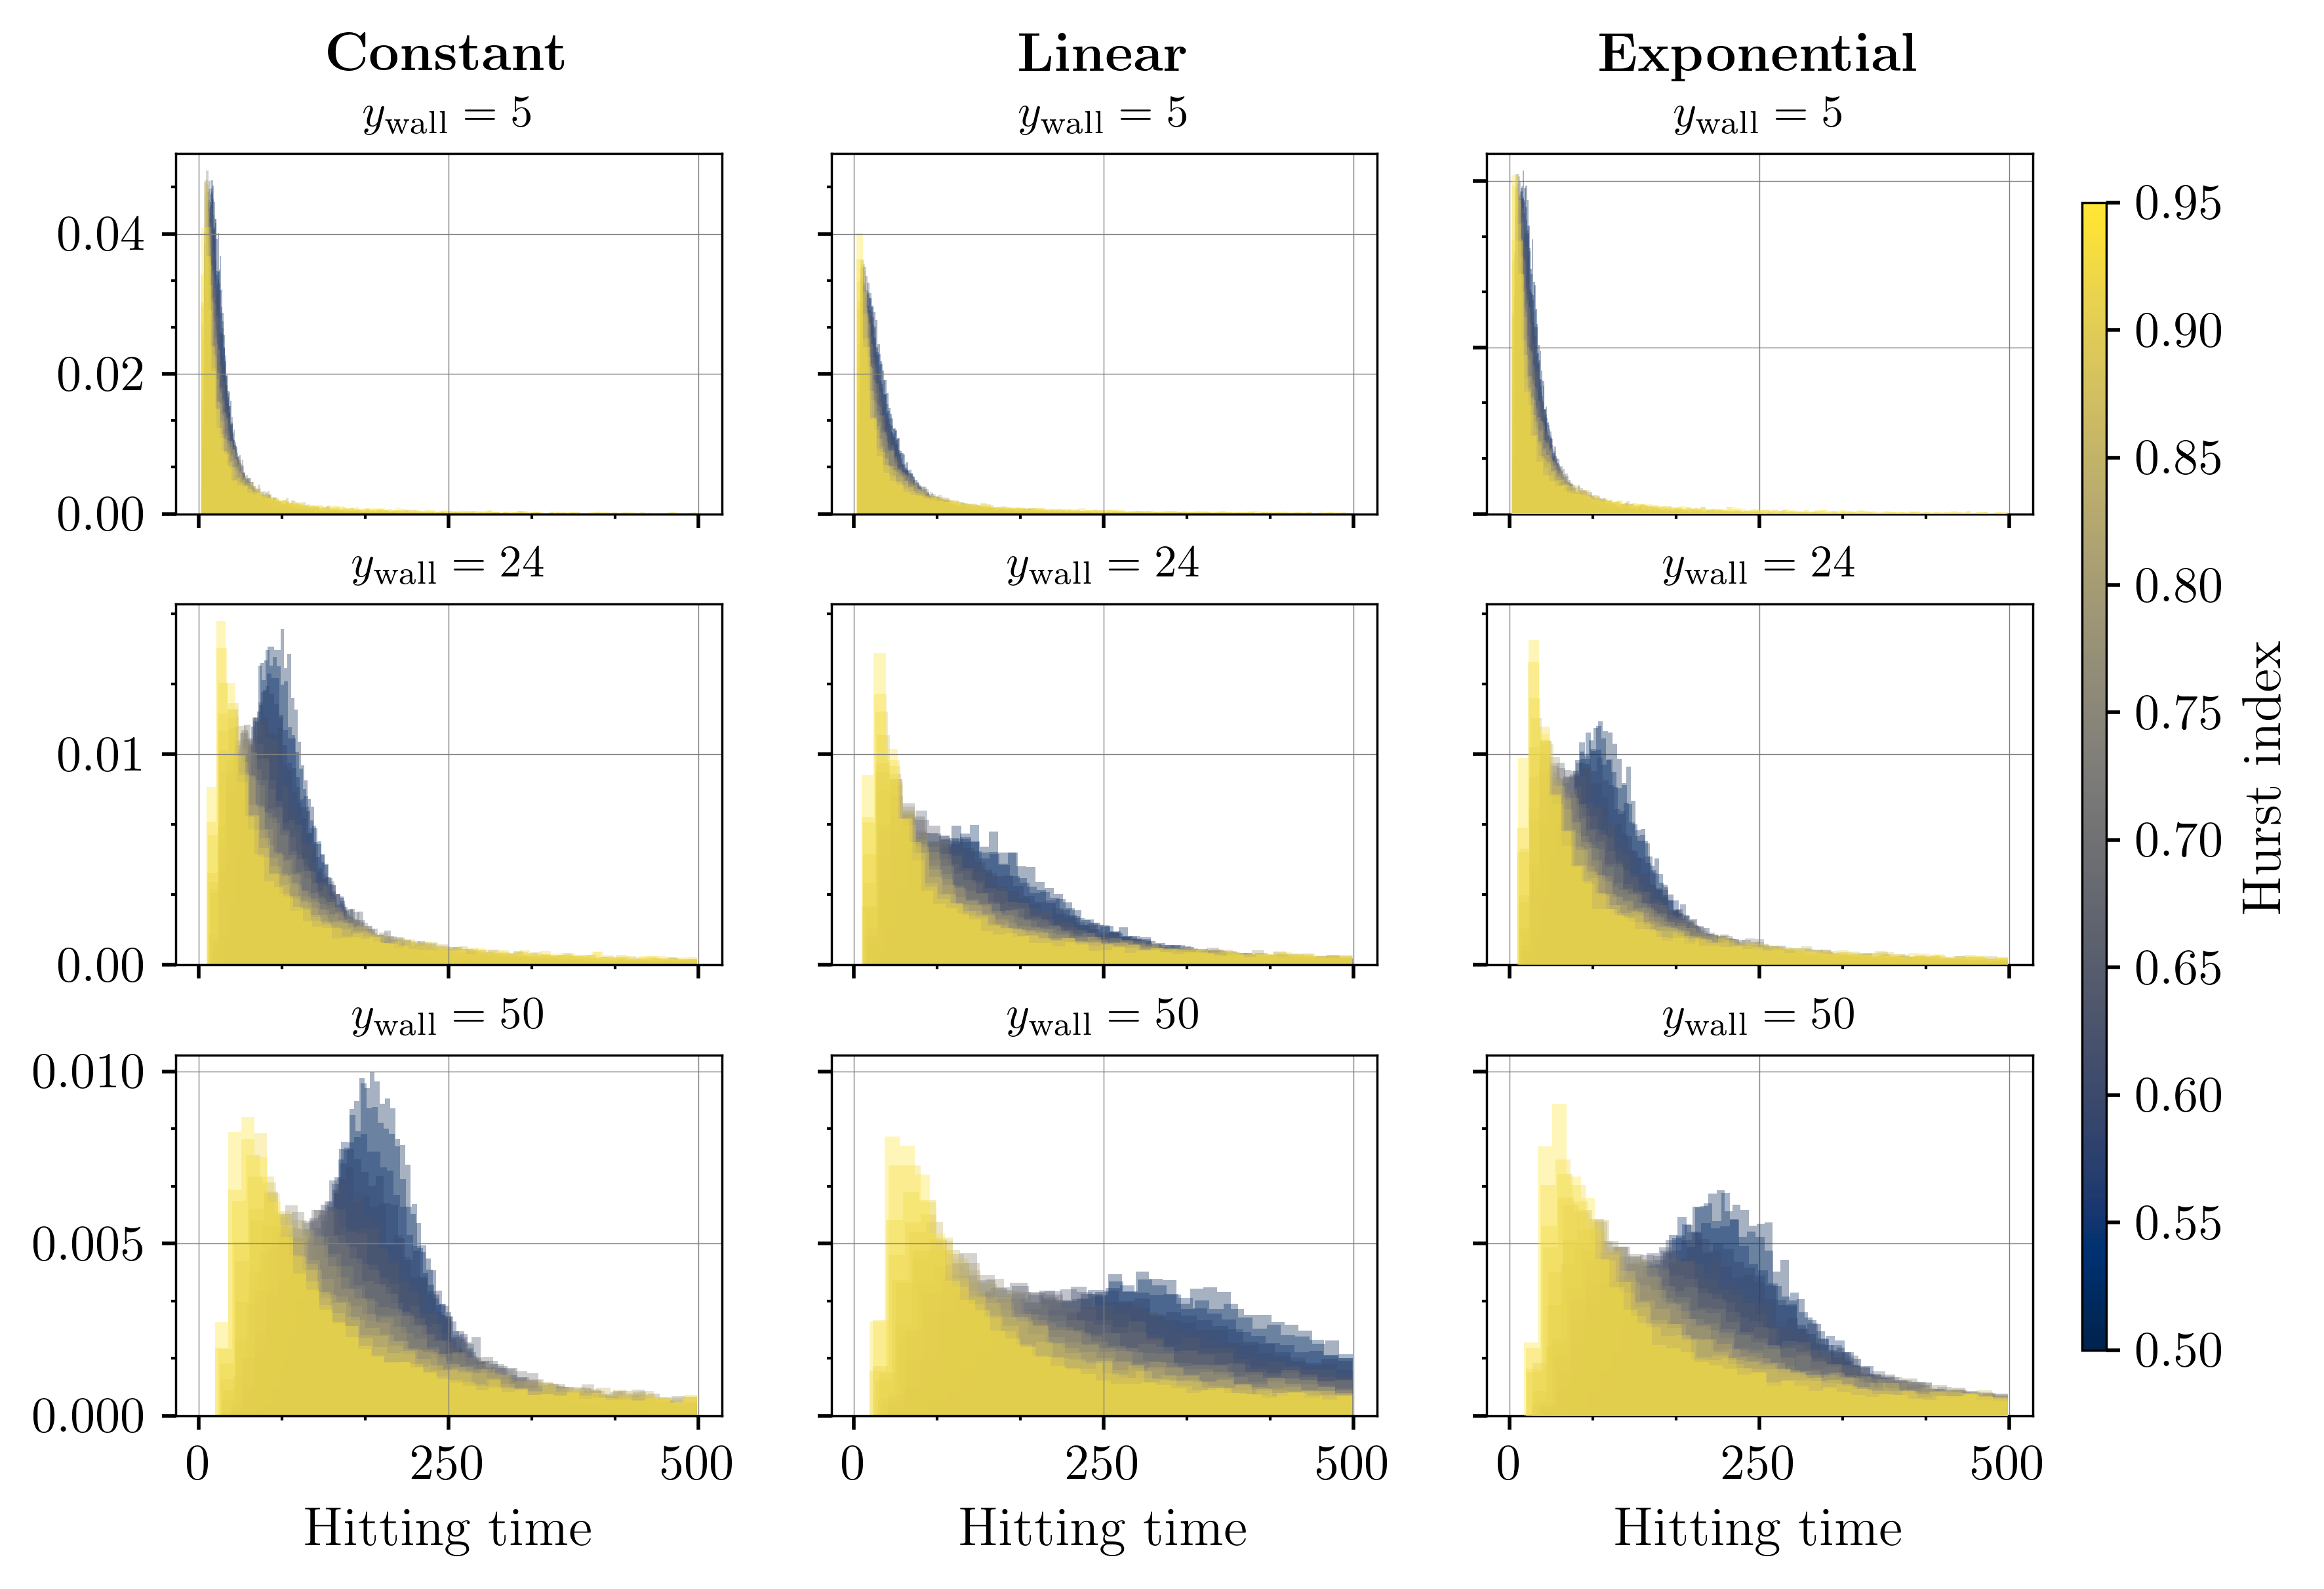

In [2]:


import os
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import ticker

#%% Plot contstant gradient
plt.rcParams.update({
    # Font and text
    "font.size": 12,
    "font.family": "serif",
    # "font.sans-serif": ["DejaVu Sans"],
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,

    "ytick.labelsize": 11,
    "text.usetex":True,
    # Axes and grid
    "axes.edgecolor": "black",
    "axes.linewidth": 0.5,
    "axes.grid": False,
    "grid.color": "lightgray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,

    # Ticks
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.minor.size": 1,
    "ytick.minor.size": 1,
    # Figure
    # "figure.figsize": (10, 6),
    # "figure.dpi": 100,
    # Lines
    "lines.linewidth": 2,
    "lines.markersize": 6,
    # Savefig
    "savefig.dpi": 500,
    "savefig.transparent": True,
})

fig, ax = plt.subplot_mosaic(
    [['Constant6', 'Linear6', 'Exponential6'],
     ['Constant24', 'Linear24', 'Exponential24'],
     ['Constant50', 'Linear50', 'Exponential50']],
    # layout='constrained', 
    figsize=(7.5, 5), dpi=500,
    sharex=True,
    # gridspec_kw={"hspace": 0.5},
    width_ratios=[1, 1, 1],
    height_ratios=[1, 1, 1],
    # sharey=True,
    gridspec_kw={"hspace": 0.25},
)

delta_plot = 0.5

folder = 'constant_h_wall_delta'
list_files = os.listdir(folder)
dict6 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 6:
        if h not in dict6:
            dict6[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict6[h] = df.to_numpy()

dict24 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 24:
        if h not in dict24:
            dict24[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict24[h] = df.to_numpy()

dict50 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 50:
        if h not in dict50:
            dict50[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict50[h] = df.to_numpy()



h_values = sorted([x for x in list(dict6.keys()) if x != 0])
wall_values = [5, 24, 50]

norm = mcolors.Normalize(vmin=min(h_values), vmax= max(h_values))
cmap = plt.cm.cividis

# h05
c = 0
for h in h_values:
    df = dict6[h]
    df = df[df<499]
    ax['Constant6'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                         zorder  = 1)
    c += 1
c = 0
for h in h_values:
    df = dict24[h]
    df = df[df<499]
    ax['Constant24'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                          zorder = 1)
    c += 1
    c += 1

c = 0
for h in h_values:
    df = dict50[h]
    df = df[df<499]
    ax['Constant50'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                          zorder = 1)
    c += 1
    c += 1

#----------- Linear
# 0.5 Consant

folder = 'linear_h_wall_delta'


list_files = os.listdir(folder)
        
dict6 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 6:
        if h not in dict6:
            dict6[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict6[h] = df.to_numpy()

dict24 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 24:
        if h not in dict24:
            dict24[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict24[h] = df.to_numpy()

dict50 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 50:
        if h not in dict50:
            dict50[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict50[h] = df.to_numpy()

h_values = sorted([x for x in list(dict6.keys()) if x != 0])

for h in h_values:
    df = dict6[h]
    df = df[df<499]
    ax['Linear6'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                       zorder = 1)

for h in h_values:
    df = dict24[h]
    df = df[df<499]
    ax['Linear24'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                        zorder = 1)

for h in h_values:
    df = dict50[h]
    df = df[df<499]
    ax['Linear50'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                        zorder = 1)

#----------- Exponential

folder = 'exponential_h_wall_delta'

# import os 
# import pandas as pd
# import numpy as np
# from os.path import join
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.colors as mcolors

list_files = os.listdir(folder)
        
dict6 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    
    if wall == 6:
        if h not in dict6:
            dict6[h] = None
        try:
            df = pd.read_csv(join(folder, archiv))
        except:
            print(f"Error reading {folder}{archiv}")
            raise
        dict6[h] = df.to_numpy()

dict24 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 24:
        if h not in dict24:
            dict24[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict24[h] = df.to_numpy()
    
dict50 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 50:
        if h not in dict50:
            dict50[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict50[h] = df.to_numpy()
        

h_values = sorted([x for x in list(dict6.keys()) if x != 0])

# h05
c = 0
for h in h_values:
    df = dict6[h]
    df = df[df<499]
    ax['Exponential6'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                            zorder = 3)
    c += 1
c = 0
for h in h_values:
    df = dict24[h]
    df = df[df<499]
    ax['Exponential24'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                             zorder = 3)
    c += 1
    c += 1

c = 0
for h in h_values:
    df = dict50[h]
    df = df[df<499]
    ax['Exponential50'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                             zorder = 3)
    c += 1
    c += 1

# ----------- Color bar

### Color bar
fig.subplots_adjust(right=0.88)  # Leave space for colorbar
cbar_ax = fig.add_axes([0.90, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Hurst index")

# X-axis
ax['Constant6'].set_xticks([0,250, 500])
ax['Constant50'].set_xlabel('Hitting time', fontsize=12)
ax['Linear50'].set_xlabel('Hitting time', fontsize=12)
ax['Exponential50'].set_xlabel('Hitting time', fontsize=12)

# Y-axis
y_limc5 = ax['Constant6'].get_ylim()
y_limc24 = ax['Constant24'].get_ylim()
y_limc50 = ax['Constant50'].get_ylim()
ax['Constant6'].set_ylim(y_limc5)
ax['Linear24'].set_ylim(y_limc24)
ax['Linear50'].set_ylim(y_limc50)
ax['Linear6'].set_ylim(y_limc5)
ax['Exponential24'].set_ylim(y_limc24)
ax['Exponential50'].set_ylim(y_limc50)
# eliminate the y axis
ax['Linear6'].set_yticklabels([])
ax['Exponential6'].set_yticklabels([])
ax['Linear24'].set_yticklabels([])
ax['Exponential24'].set_yticklabels([])
ax['Linear50'].set_yticklabels([])
ax['Exponential50'].set_yticklabels([])



# Titles
ax['Constant6'].set_title(r'$y_{\mathrm{wall}} = 5$', fontsize = 10)
ax['Constant24'].set_title(r'$y_{\mathrm{wall}} = 24$', fontsize = 10)
ax['Constant50'].set_title(r'$y_{\mathrm{wall}} = 50$', fontsize = 10)
ax['Linear6'].set_title(r'$y_{\mathrm{wall}} = 5$', fontsize = 10)
ax['Linear24'].set_title(r'$y_{\mathrm{wall}} = 24$', fontsize = 10)
ax['Linear50'].set_title(r'$y_{\mathrm{wall}} = 50$', fontsize = 10)
ax['Exponential6'].set_title(r'$y_{\mathrm{wall}} = 5$', fontsize = 10)
ax['Exponential24'].set_title(r'$y_{\mathrm{wall}} = 24$', fontsize = 10)
ax['Exponential50'].set_title(r'$y_{\mathrm{wall}} = 50$', fontsize = 10)

# labels

ax['Constant6'].annotate(
    r'\textbf{Constant}',
    xy = (0.5, 1.2), xycoords='axes fraction',
    ha='center', va='bottom',
    fontsize=12
)

ax['Linear6'].annotate(
    r'\textbf{Linear}',
    xy = (0.5, 1.2), xycoords='axes fraction',
    ha='center', va='bottom',
    fontsize=12
)

ax['Exponential6'].annotate(
    r'\textbf{Exponential}',
    xy = (0.5, 1.2), xycoords='axes fraction',
    ha='center', va='bottom',
    fontsize=12
)


for a in ax.values():
    a.xaxis.set_minor_locator(ticker.AutoMinorLocator(3))  # 3 minor ticks per major
    a.yaxis.set_minor_locator(ticker.AutoMinorLocator(3))
    a.grid(which='major', color='gray', linestyle='-', linewidth=0.2, zorder = 0)
    
# fig.savefig(join('figures', 'hitting_time_distribution_all.pdf'), dpi=500, bbox_inches='tight')
# fig.savefig(join('figures', 'hitting_time_distribution_all.pdf'), dpi=500, bbox_inches='tight')

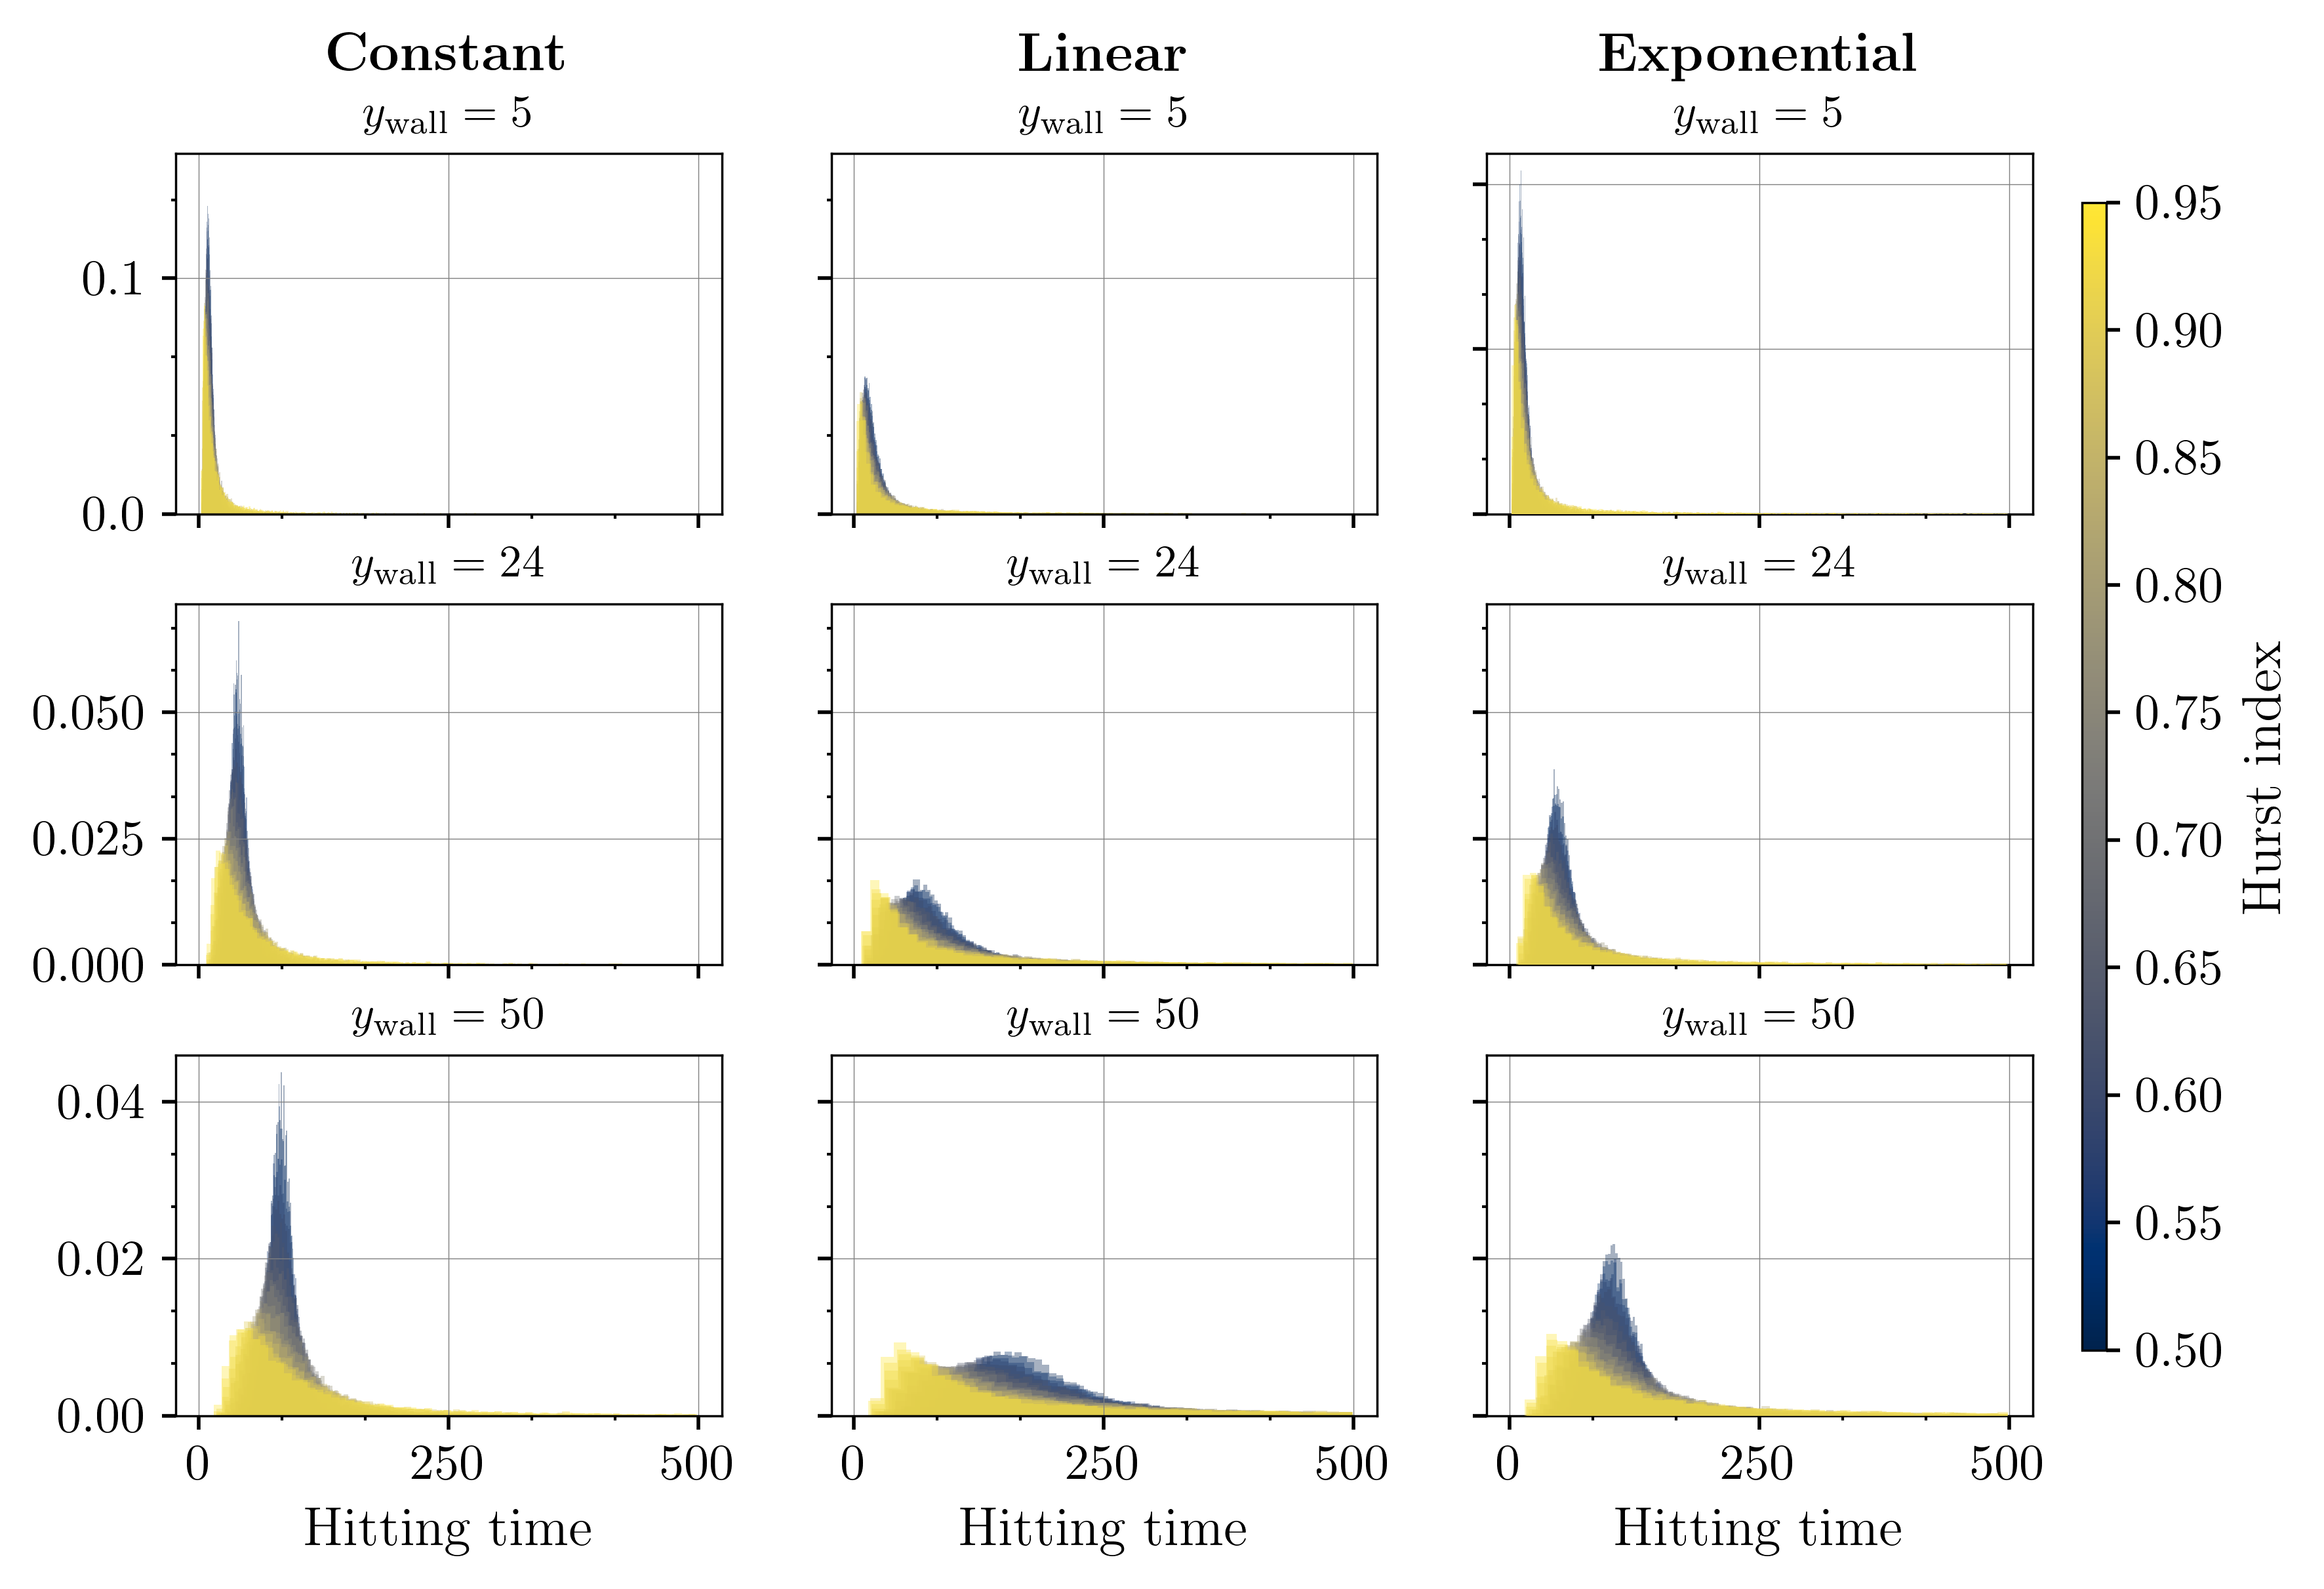

In [3]:


import os
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import ticker

#%% Plot contstant gradient
plt.rcParams.update({
    # Font and text
    "font.size": 12,
    "font.family": "serif",
    # "font.sans-serif": ["DejaVu Sans"],
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,

    "ytick.labelsize": 11,
    "text.usetex":True,
    # Axes and grid
    "axes.edgecolor": "black",
    "axes.linewidth": 0.5,
    "axes.grid": False,
    "grid.color": "lightgray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,

    # Ticks
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.minor.size": 1,
    "ytick.minor.size": 1,
    # Figure
    # "figure.figsize": (10, 6),
    # "figure.dpi": 100,
    # Lines
    "lines.linewidth": 2,
    "lines.markersize": 6,
    # Savefig
    "savefig.dpi": 500,
    "savefig.transparent": True,
})

fig, ax = plt.subplot_mosaic(
    [['Constant6', 'Linear6', 'Exponential6'],
     ['Constant24', 'Linear24', 'Exponential24'],
     ['Constant50', 'Linear50', 'Exponential50']],
    # layout='constrained', 
    figsize=(7.5, 5), dpi=500,
    sharex=True,
    # gridspec_kw={"hspace": 0.5},
    width_ratios=[1, 1, 1],
    height_ratios=[1, 1, 1],
    # sharey=True,
    gridspec_kw={"hspace": 0.25},
)

delta_plot = 1.5

folder = 'constant_h_wall_delta'
list_files = os.listdir(folder)
dict6 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 6:
        if h not in dict6:
            dict6[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict6[h] = df.to_numpy()

dict24 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 24:
        if h not in dict24:
            dict24[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict24[h] = df.to_numpy()

dict50 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 50:
        if h not in dict50:
            dict50[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict50[h] = df.to_numpy()



h_values = sorted([x for x in list(dict6.keys()) if x != 0])
wall_values = [5, 24, 50]

norm = mcolors.Normalize(vmin=min(h_values), vmax= max(h_values))
cmap = plt.cm.cividis

# h05
c = 0
for h in h_values:
    df = dict6[h]
    df = df[df<499]
    ax['Constant6'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                         zorder  = 1)
    c += 1
c = 0
for h in h_values:
    df = dict24[h]
    df = df[df<499]
    ax['Constant24'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                          zorder = 1)
    c += 1
    c += 1

c = 0
for h in h_values:
    df = dict50[h]
    df = df[df<499]
    ax['Constant50'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                          zorder = 1)
    c += 1
    c += 1

#----------- Linear
# 0.5 Consant

folder = 'linear_h_wall_delta'


list_files = os.listdir(folder)
        
dict6 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 6:
        if h not in dict6:
            dict6[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict6[h] = df.to_numpy()

dict24 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 24:
        if h not in dict24:
            dict24[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict24[h] = df.to_numpy()

dict50 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 50:
        if h not in dict50:
            dict50[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict50[h] = df.to_numpy()

h_values = sorted([x for x in list(dict6.keys()) if x != 0])

for h in h_values:
    df = dict6[h]
    df = df[df<499]
    ax['Linear6'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                       zorder = 1)

for h in h_values:
    df = dict24[h]
    df = df[df<499]
    ax['Linear24'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                        zorder = 1)

for h in h_values:
    df = dict50[h]
    df = df[df<499]
    ax['Linear50'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                        zorder = 1)

#----------- Exponential

folder = 'exponential_h_wall_delta'

# import os 
# import pandas as pd
# import numpy as np
# from os.path import join
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.colors as mcolors

list_files = os.listdir(folder)
        
dict6 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    
    if wall == 6:
        if h not in dict6:
            dict6[h] = None
        try:
            df = pd.read_csv(join(folder, archiv))
        except:
            print(f"Error reading {folder}{archiv}")
            raise
        dict6[h] = df.to_numpy()

dict24 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 24:
        if h not in dict24:
            dict24[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict24[h] = df.to_numpy()
    
dict50 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 50:
        if h not in dict50:
            dict50[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict50[h] = df.to_numpy()
        

h_values = sorted([x for x in list(dict6.keys()) if x != 0])

# h05
c = 0
for h in h_values:
    df = dict6[h]
    df = df[df<499]
    ax['Exponential6'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                            zorder = 3)
    c += 1
c = 0
for h in h_values:
    df = dict24[h]
    df = df[df<499]
    ax['Exponential24'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                             zorder = 3)
    c += 1
    c += 1

c = 0
for h in h_values:
    df = dict50[h]
    df = df[df<499]
    ax['Exponential50'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                             zorder = 3)
    c += 1
    c += 1

# ----------- Color bar

### Color bar
fig.subplots_adjust(right=0.88)  # Leave space for colorbar
cbar_ax = fig.add_axes([0.90, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Hurst index")

# X-axis
ax['Constant6'].set_xticks([0,250, 500])
ax['Constant50'].set_xlabel('Hitting time', fontsize=12)
ax['Linear50'].set_xlabel('Hitting time', fontsize=12)
ax['Exponential50'].set_xlabel('Hitting time', fontsize=12)

# Y-axis
y_limc5 = ax['Constant6'].get_ylim()
y_limc24 = ax['Constant24'].get_ylim()
y_limc50 = ax['Constant50'].get_ylim()
ax['Constant6'].set_ylim(y_limc5)
ax['Linear24'].set_ylim(y_limc24)
ax['Linear50'].set_ylim(y_limc50)
ax['Linear6'].set_ylim(y_limc5)
ax['Exponential24'].set_ylim(y_limc24)
ax['Exponential50'].set_ylim(y_limc50)
# eliminate the y axis
ax['Linear6'].set_yticklabels([])
ax['Exponential6'].set_yticklabels([])
ax['Linear24'].set_yticklabels([])
ax['Exponential24'].set_yticklabels([])
ax['Linear50'].set_yticklabels([])
ax['Exponential50'].set_yticklabels([])



# Titles
ax['Constant6'].set_title(r'$y_{\mathrm{wall}} = 5$', fontsize = 10)
ax['Constant24'].set_title(r'$y_{\mathrm{wall}} = 24$', fontsize = 10)
ax['Constant50'].set_title(r'$y_{\mathrm{wall}} = 50$', fontsize = 10)
ax['Linear6'].set_title(r'$y_{\mathrm{wall}} = 5$', fontsize = 10)
ax['Linear24'].set_title(r'$y_{\mathrm{wall}} = 24$', fontsize = 10)
ax['Linear50'].set_title(r'$y_{\mathrm{wall}} = 50$', fontsize = 10)
ax['Exponential6'].set_title(r'$y_{\mathrm{wall}} = 5$', fontsize = 10)
ax['Exponential24'].set_title(r'$y_{\mathrm{wall}} = 24$', fontsize = 10)
ax['Exponential50'].set_title(r'$y_{\mathrm{wall}} = 50$', fontsize = 10)

# labels

ax['Constant6'].annotate(
    r'\textbf{Constant}',
    xy = (0.5, 1.2), xycoords='axes fraction',
    ha='center', va='bottom',
    fontsize=12
)

ax['Linear6'].annotate(
    r'\textbf{Linear}',
    xy = (0.5, 1.2), xycoords='axes fraction',
    ha='center', va='bottom',
    fontsize=12
)

ax['Exponential6'].annotate(
    r'\textbf{Exponential}',
    xy = (0.5, 1.2), xycoords='axes fraction',
    ha='center', va='bottom',
    fontsize=12
)


for a in ax.values():
    a.xaxis.set_minor_locator(ticker.AutoMinorLocator(3))  # 3 minor ticks per major
    a.yaxis.set_minor_locator(ticker.AutoMinorLocator(3))
    a.grid(which='major', color='gray', linestyle='-', linewidth=0.2, zorder = 0)
    
# fig.savefig(join('figures', 'hitting_time_distribution_all.pdf'), dpi=500, bbox_inches='tight')

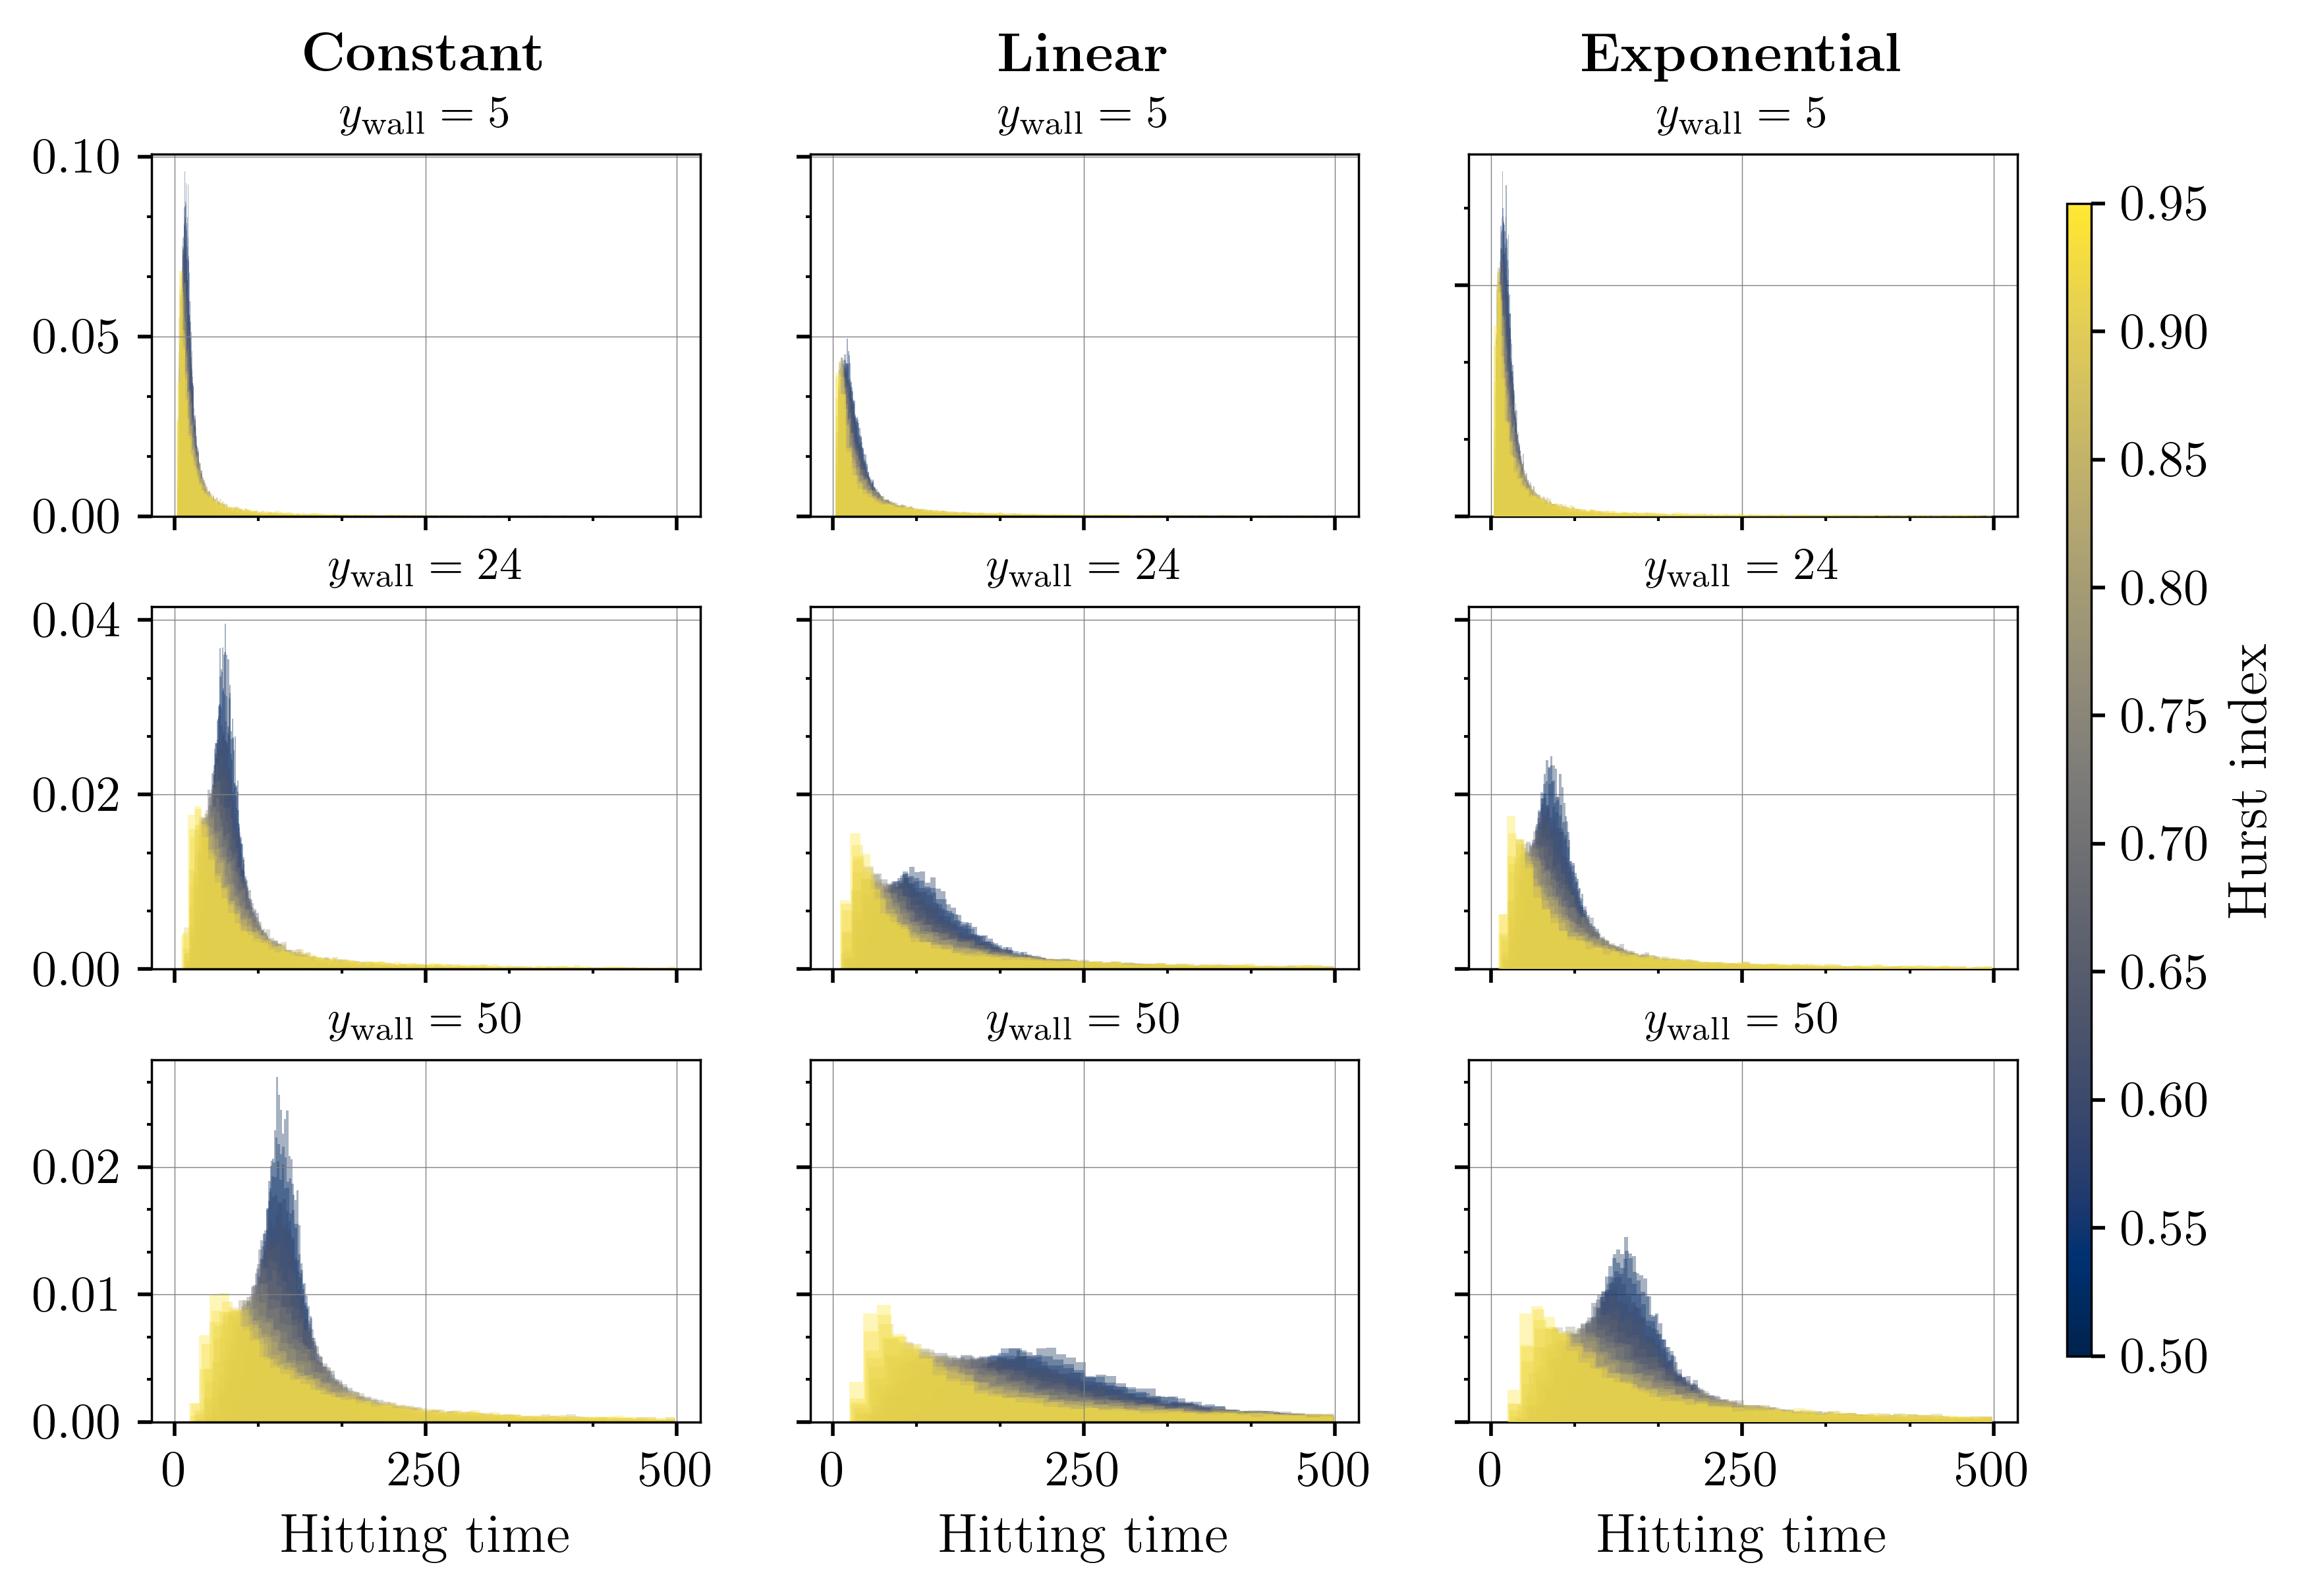

In [4]:


import os
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import ticker

#%% Plot contstant gradient
plt.rcParams.update({
    # Font and text
    "font.size": 12,
    "font.family": "serif",
    # "font.sans-serif": ["DejaVu Sans"],
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,

    "ytick.labelsize": 11,
    "text.usetex":True,
    # Axes and grid
    "axes.edgecolor": "black",
    "axes.linewidth": 0.5,
    "axes.grid": False,
    "grid.color": "lightgray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,

    # Ticks
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.minor.size": 1,
    "ytick.minor.size": 1,
    # Figure
    # "figure.figsize": (10, 6),
    # "figure.dpi": 100,
    # Lines
    "lines.linewidth": 2,
    "lines.markersize": 6,
    # Savefig
    "savefig.dpi": 500,
    "savefig.transparent": True,
})

fig, ax = plt.subplot_mosaic(
    [['Constant6', 'Linear6', 'Exponential6'],
     ['Constant24', 'Linear24', 'Exponential24'],
     ['Constant50', 'Linear50', 'Exponential50']],
    # layout='constrained', 
    figsize=(7.5, 5), dpi=500,
    sharex=True,
    # gridspec_kw={"hspace": 0.5},
    width_ratios=[1, 1, 1],
    height_ratios=[1, 1, 1],
    # sharey=True,
    gridspec_kw={"hspace": 0.25},
)

delta_plot = 1

folder = 'constant_h_wall_delta'
list_files = os.listdir(folder)
dict6 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 6:
        if h not in dict6:
            dict6[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict6[h] = df.to_numpy()

dict24 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 24:
        if h not in dict24:
            dict24[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict24[h] = df.to_numpy()

dict50 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 50:
        if h not in dict50:
            dict50[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict50[h] = df.to_numpy()



h_values = sorted([x for x in list(dict6.keys()) if x != 0])
wall_values = [5, 24, 50]

norm = mcolors.Normalize(vmin=min(h_values), vmax= max(h_values))
cmap = plt.cm.cividis

# h05
c = 0
for h in h_values:
    df = dict6[h]
    df = df[df<499]
    ax['Constant6'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                         zorder  = 1)
    c += 1
c = 0
for h in h_values:
    df = dict24[h]
    df = df[df<499]
    ax['Constant24'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                          zorder = 1)
    c += 1
    c += 1

c = 0
for h in h_values:
    df = dict50[h]
    df = df[df<499]
    ax['Constant50'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                          zorder = 1)
    c += 1
    c += 1

#----------- Linear
# 0.5 Consant

folder = 'linear_h_wall_delta'


list_files = os.listdir(folder)
        
dict6 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 6:
        if h not in dict6:
            dict6[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict6[h] = df.to_numpy()

dict24 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 24:
        if h not in dict24:
            dict24[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict24[h] = df.to_numpy()

dict50 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 50:
        if h not in dict50:
            dict50[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict50[h] = df.to_numpy()

h_values = sorted([x for x in list(dict6.keys()) if x != 0])

for h in h_values:
    df = dict6[h]
    df = df[df<499]
    ax['Linear6'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                       zorder = 1)

for h in h_values:
    df = dict24[h]
    df = df[df<499]
    ax['Linear24'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                        zorder = 1)

for h in h_values:
    df = dict50[h]
    df = df[df<499]
    ax['Linear50'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                        zorder = 1)

#----------- Exponential

folder = 'exponential_h_wall_delta'

# import os 
# import pandas as pd
# import numpy as np
# from os.path import join
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.colors as mcolors

list_files = os.listdir(folder)
        
dict6 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    
    if wall == 6:
        if h not in dict6:
            dict6[h] = None
        try:
            df = pd.read_csv(join(folder, archiv))
        except:
            print(f"Error reading {folder}{archiv}")
            raise
        dict6[h] = df.to_numpy()

dict24 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 24:
        if h not in dict24:
            dict24[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict24[h] = df.to_numpy()
    
dict50 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if delta != delta_plot:
        continue
    if wall == 50:
        if h not in dict50:
            dict50[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict50[h] = df.to_numpy()
        

h_values = sorted([x for x in list(dict6.keys()) if x != 0])

# h05
c = 0
for h in h_values:
    df = dict6[h]
    df = df[df<499]
    ax['Exponential6'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                            zorder = 3)
    c += 1
c = 0
for h in h_values:
    df = dict24[h]
    df = df[df<499]
    ax['Exponential24'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                             zorder = 3)
    c += 1
    c += 1

c = 0
for h in h_values:
    df = dict50[h]
    df = df[df<499]
    ax['Exponential50'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                             zorder = 3)
    c += 1
    c += 1

# ----------- Color bar

### Color bar
fig.subplots_adjust(right=0.88)  # Leave space for colorbar
cbar_ax = fig.add_axes([0.90, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Hurst index")

# X-axis
ax['Constant6'].set_xticks([0,250, 500])
ax['Constant50'].set_xlabel('Hitting time', fontsize=12)
ax['Linear50'].set_xlabel('Hitting time', fontsize=12)
ax['Exponential50'].set_xlabel('Hitting time', fontsize=12)

# Y-axis
y_limc5 = ax['Constant6'].get_ylim()
y_limc24 = ax['Constant24'].get_ylim()
y_limc50 = ax['Constant50'].get_ylim()
ax['Constant6'].set_ylim(y_limc5)
ax['Linear24'].set_ylim(y_limc24)
ax['Linear50'].set_ylim(y_limc50)
ax['Linear6'].set_ylim(y_limc5)
ax['Exponential24'].set_ylim(y_limc24)
ax['Exponential50'].set_ylim(y_limc50)
# eliminate the y axis
ax['Linear6'].set_yticklabels([])
ax['Exponential6'].set_yticklabels([])
ax['Linear24'].set_yticklabels([])
ax['Exponential24'].set_yticklabels([])
ax['Linear50'].set_yticklabels([])
ax['Exponential50'].set_yticklabels([])



# Titles
ax['Constant6'].set_title(r'$y_{\mathrm{wall}} = 5$', fontsize = 10)
ax['Constant24'].set_title(r'$y_{\mathrm{wall}} = 24$', fontsize = 10)
ax['Constant50'].set_title(r'$y_{\mathrm{wall}} = 50$', fontsize = 10)
ax['Linear6'].set_title(r'$y_{\mathrm{wall}} = 5$', fontsize = 10)
ax['Linear24'].set_title(r'$y_{\mathrm{wall}} = 24$', fontsize = 10)
ax['Linear50'].set_title(r'$y_{\mathrm{wall}} = 50$', fontsize = 10)
ax['Exponential6'].set_title(r'$y_{\mathrm{wall}} = 5$', fontsize = 10)
ax['Exponential24'].set_title(r'$y_{\mathrm{wall}} = 24$', fontsize = 10)
ax['Exponential50'].set_title(r'$y_{\mathrm{wall}} = 50$', fontsize = 10)

# labels

ax['Constant6'].annotate(
    r'\textbf{Constant}',
    xy = (0.5, 1.2), xycoords='axes fraction',
    ha='center', va='bottom',
    fontsize=12
)

ax['Linear6'].annotate(
    r'\textbf{Linear}',
    xy = (0.5, 1.2), xycoords='axes fraction',
    ha='center', va='bottom',
    fontsize=12
)

ax['Exponential6'].annotate(
    r'\textbf{Exponential}',
    xy = (0.5, 1.2), xycoords='axes fraction',
    ha='center', va='bottom',
    fontsize=12
)


for a in ax.values():
    a.xaxis.set_minor_locator(ticker.AutoMinorLocator(3))  # 3 minor ticks per major
    a.yaxis.set_minor_locator(ticker.AutoMinorLocator(3))
    a.grid(which='major', color='gray', linestyle='-', linewidth=0.2, zorder = 0)
    
# fig.savefig(join('figures', 'hitting_time_distribution_all.pdf'), dpi=500, bbox_inches='tight')

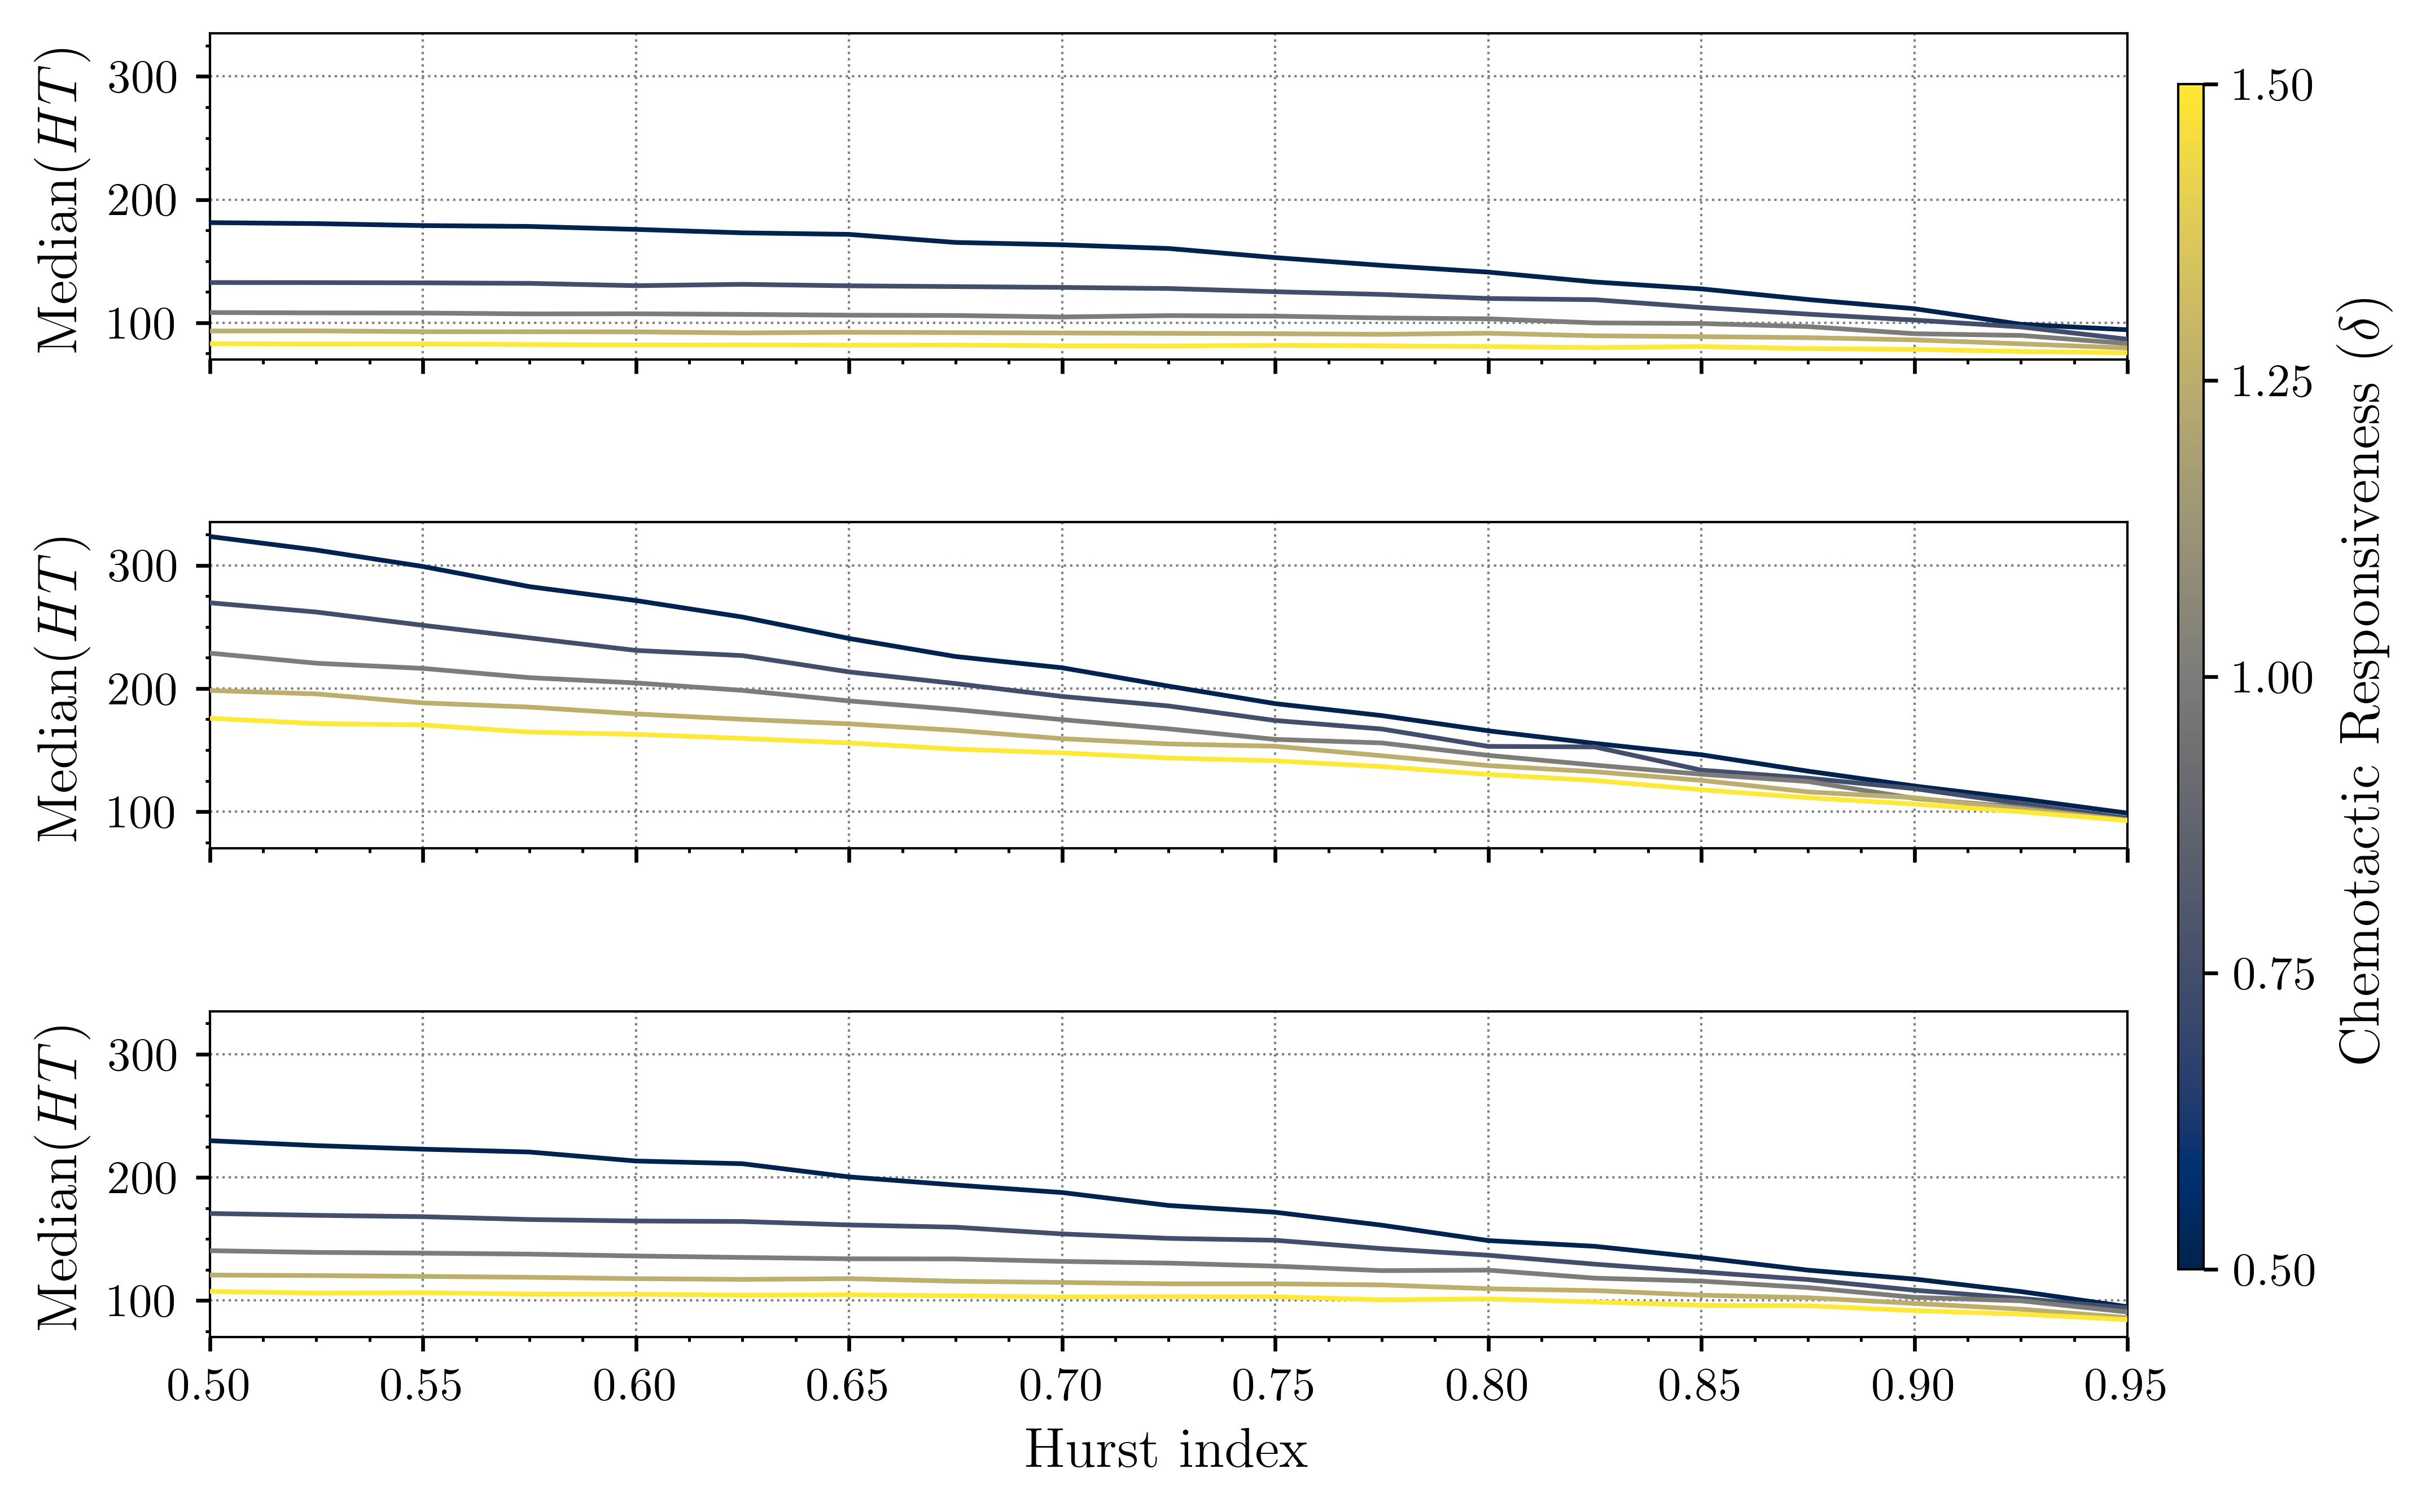

In [ ]:
import os
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import ticker

#%% Plot contstant gradient
plt.rcParams.update({
    # Font and text
    "font.size": 12,
    "font.family": "serif",
    # "font.sans-serif": ["DejaVu Sans"],
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 10,

    "ytick.labelsize": 10,
    "text.usetex":True,
    # Axes and grid
    "axes.edgecolor": "black",
    "axes.linewidth": 0.5,
    "axes.grid": False,
    "grid.color": "lightgray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,

    # Ticks
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.minor.size": 1,
    "ytick.minor.size": 1,
    # Figure
    # "figure.figsize": (10, 6),
    # "figure.dpi": 100,
    # Lines
    "lines.linewidth": 2,
    "lines.markersize": 6,
    # Savefig
    "savefig.dpi": 500,
    "savefig.transparent": True,
})


fig, ax = plt.subplot_mosaic(
    [['Constant'],
     ['Linear'],
     ['Exponential']],
    figsize=(7.5, 5), dpi=600,
    sharex=True,
    # sharey=True,
    gridspec_kw={"hspace": 0.5},
)

folder = 'constant_h_wall_delta'

list_files = os.listdir(folder)
delta_values = [0.5, 0.75, 1, 1.25, 1.5]



norm = mcolors.Normalize(vmin=min(delta_values), vmax= max(delta_values))
cmap = plt.cm.cividis
dict_values_plot = {d: [] for d in delta_values} # each item is a tuple of the moment and wall

for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if wall == 50:
        df = pd.read_csv(join(folder, archiv)).dropna()
        moment = np.median(df.to_numpy())
        
        dict_values_plot[delta].append((h, moment))

for key,  value in dict_values_plot.items():
    df_val = pd.DataFrame(columns = ['H', 'Moment'])
    for i, tup in enumerate(value):
        df_val.loc[i, :] = tup[0], tup[1]
    df_val.sort_values(by = 'H', inplace=True)
    df_val.reset_index(inplace=True, drop = True)
    ax['Constant'].plot(df_val['H'], df_val['Moment'],
                        linewidth = 1,
                        color = cmap(norm(key)), zorder = 3 + key)
    
    
    
#----------- Linear
folder = 'linear_h_wall_delta'
list_files = os.listdir(folder)

dict_values_plot = {d: [] for d in delta_values} # each item is a tuple of the moment and wall
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if wall == 50:
        df = pd.read_csv(join(folder, archiv)).dropna()
        moment = np.median(df.to_numpy())
        
        dict_values_plot[delta].append((h, moment))
    
for key,  value in dict_values_plot.items():
    df_val = pd.DataFrame(columns = ['H', 'Moment'])
    for i, tup in enumerate(value):
        df_val.loc[i, :] = tup[0], tup[1]
    df_val.sort_values(by = 'H', inplace=True)
    df_val.reset_index(inplace=True, drop = True)
    ax['Linear'].plot(df_val['H'], df_val['Moment'],
                      linewidth = 1,
                      color = cmap(norm(key)), zorder = 3 + key)
        
        
# ----------- Exponential

folder = 'exponential_h_wall_delta'
list_files = os.listdir(folder)
dict_values_plot = {d: [] for d in delta_values} # each item is a tuple of the moment and wall
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if wall == 50:
        df = pd.read_csv(join(folder, archiv)).dropna()
        moment = np.median(df.to_numpy())
        
        dict_values_plot[delta].append((h, moment))

for key,  value in dict_values_plot.items():
    df_val = pd.DataFrame(columns = ['H', 'Moment'])
    for i, tup in enumerate(value):
        df_val.loc[i, :] = tup[0], tup[1]
    df_val.sort_values(by = 'H', inplace=True)
    df_val.reset_index(inplace=True, drop = True)
    ax['Exponential'].plot(df_val['H'], df_val['Moment'],
                            linewidth = 1,
                            color = cmap(norm(key)), zorder = 3 + key)


# --- X axis

ax['Constant'].set_xticks([0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95])
ax['Exponential'].set_xlabel('Hurst index', fontsize = 12)
ax['Constant'].set_xlim([0.5, 0.95])
# --- Y axis
c_ylim = ax['Constant'].get_ylim()
l_ylim = ax['Linear'].get_ylim()
e_ylim = ax['Exponential'].get_ylim()


# ax['Constant'].set_yscale('log')
# ax['Linear'].set_yscale('log')
# ax['Exponential'].set_yscale('log')

ylims = [np.min([c_ylim[0], l_ylim[0], e_ylim[0]]), np.max([c_ylim[1], l_ylim[1], e_ylim[1]])]
ax['Constant'].set_ylim(ylims)
ax['Linear'].set_ylim(ylims)
ax['Exponential'].set_ylim(ylims)

ax['Constant'].set_ylabel(r'Median($HT$)', fontsize = 12)
ax['Linear'].set_ylabel(r'Median($HT$)', fontsize = 12)
ax['Exponential'].set_ylabel(r'Median($HT$)', fontsize = 12)

# ticks
for a in ax.values():
    a.xaxis.set_minor_locator(ticker.AutoMinorLocator(4))  # 3 minor ticks per major
    a.yaxis.set_minor_locator(ticker.AutoMinorLocator(4))
    a.grid(which='major', color='gray', linestyle=':', linewidth=0.5, zorder = 0)
    a.grid(which='major', color='gray', linestyle=':', linewidth=0.5, zorder = 0)
    


fig.subplots_adjust(right=0.88)  # Leave space for colorbar
cbar_ax = fig.add_axes([0.90, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_ticks(delta_values)
cbar.set_label(r"Chemotactic Responsiveness $(\delta)$", fontsize = 12)


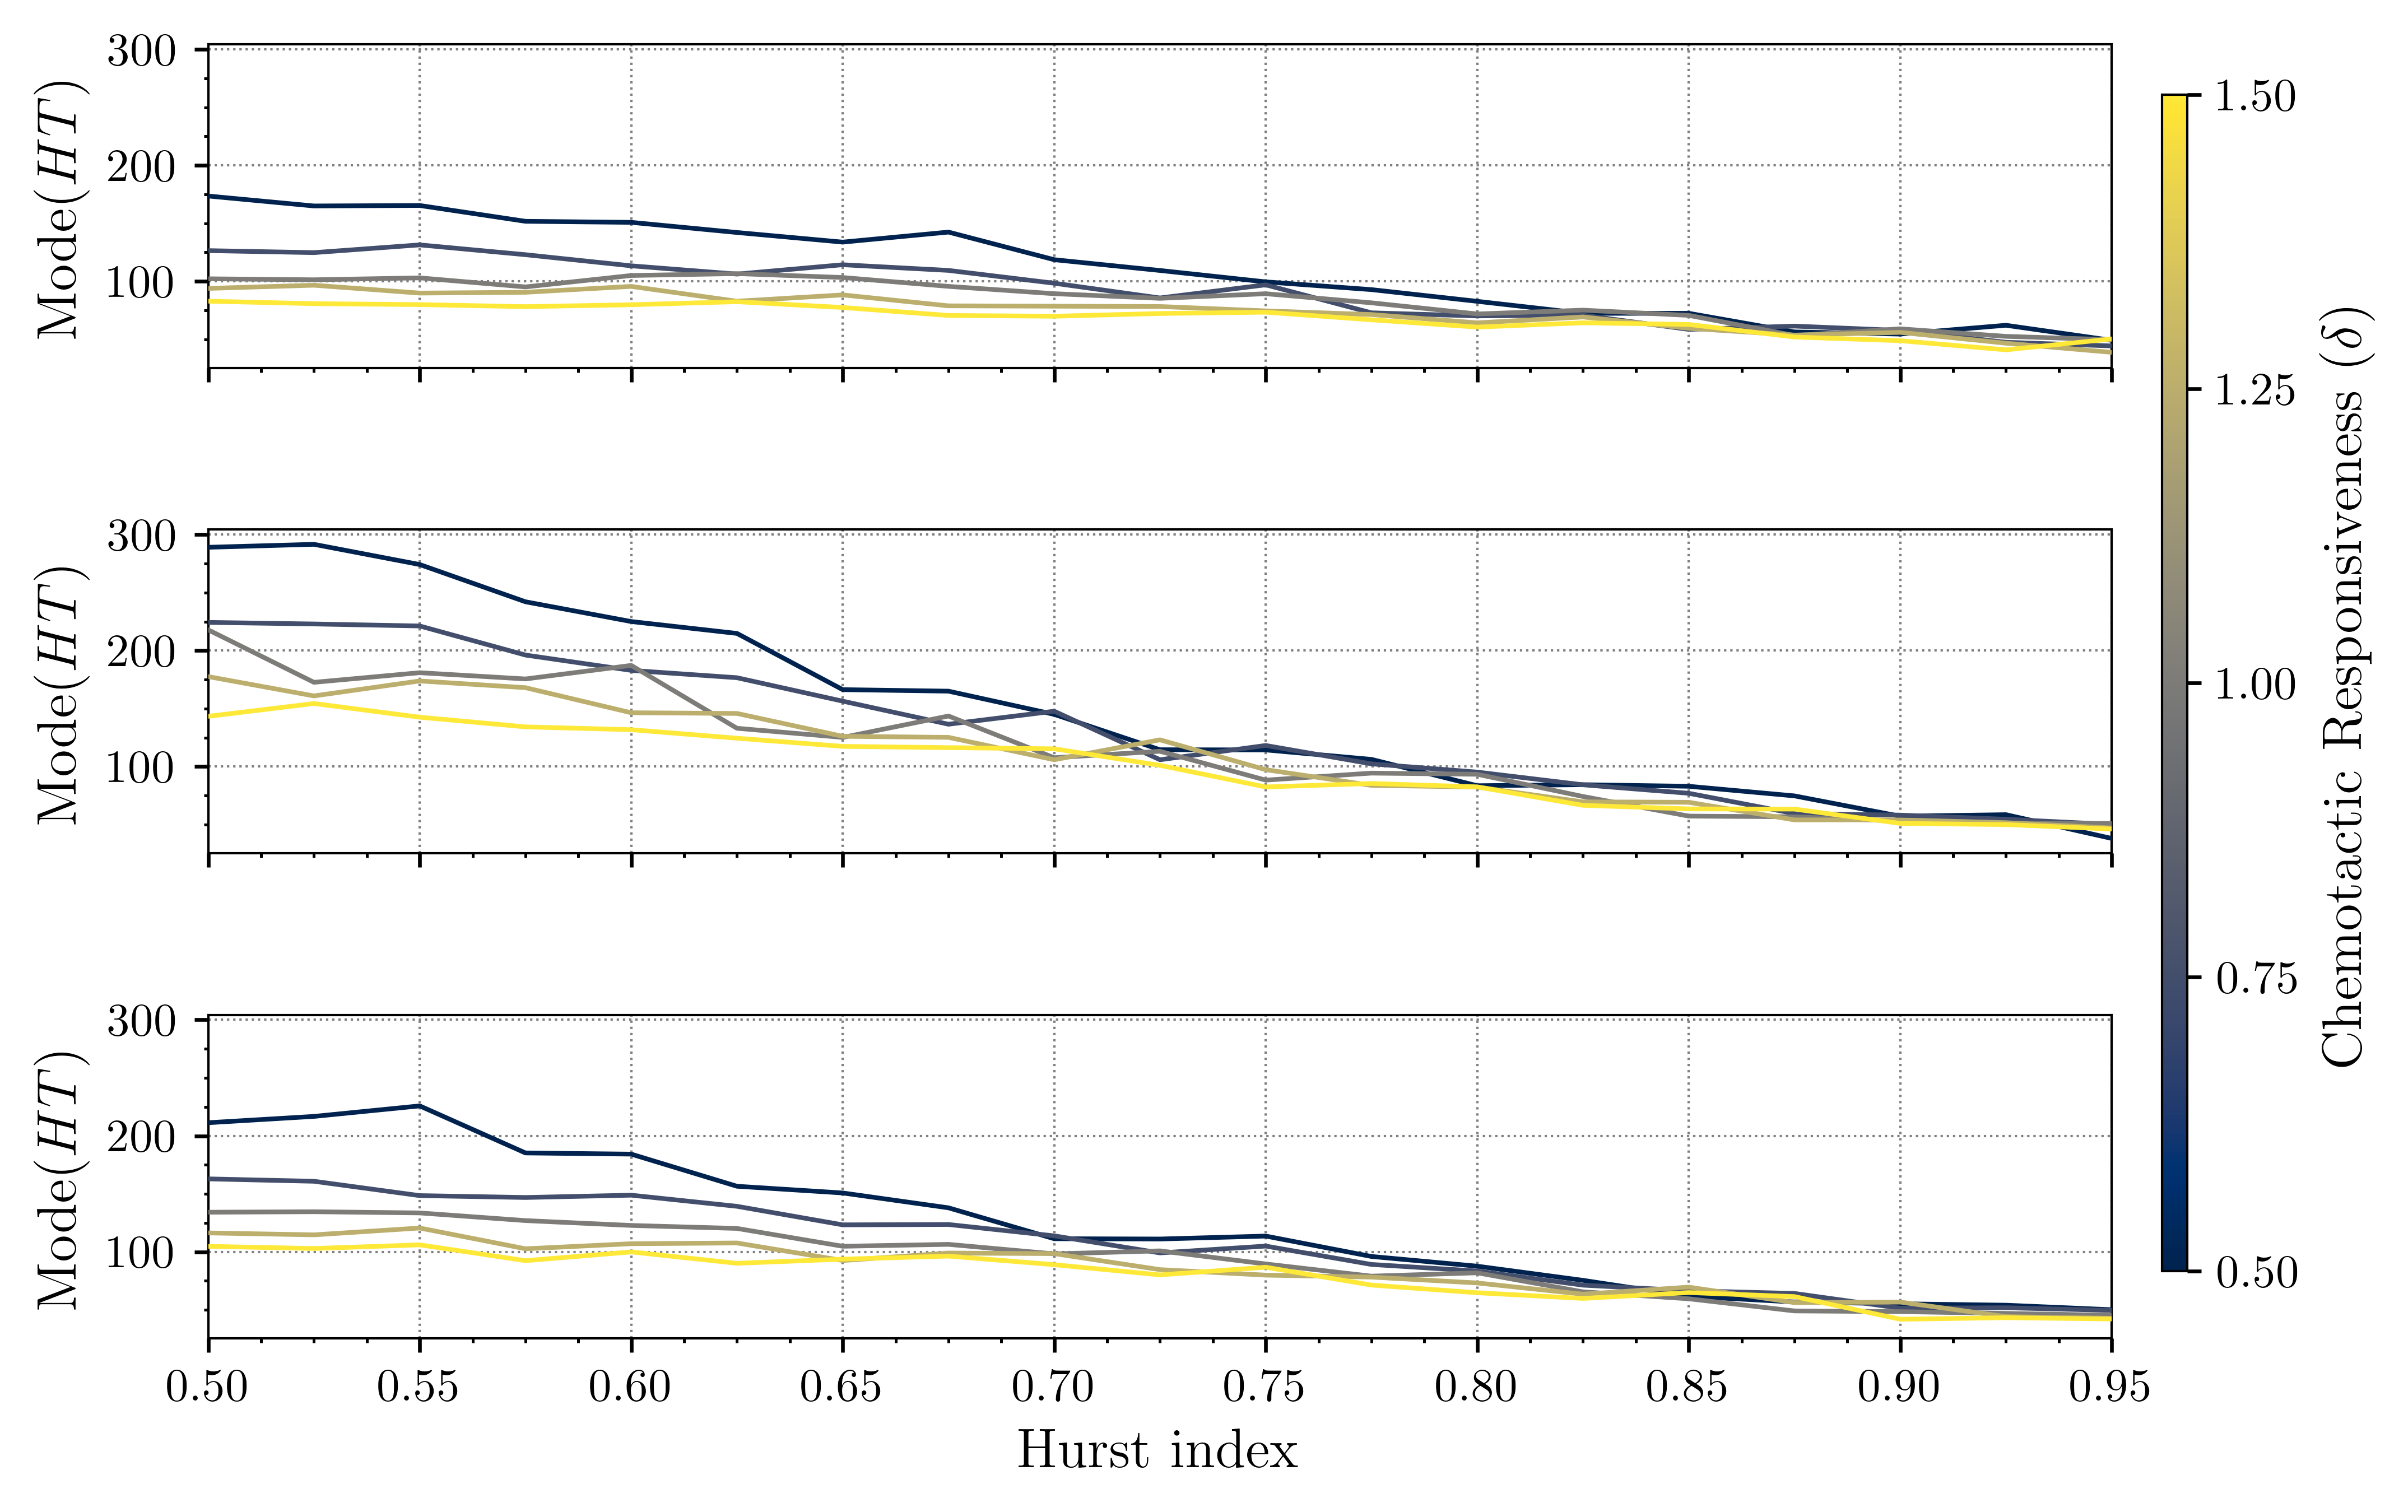

In [ ]:
import os
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import ticker

#%% Plot contstant gradient
plt.rcParams.update({
    # Font and text
    "font.size": 12,
    "font.family": "serif",
    # "font.sans-serif": ["DejaVu Sans"],
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 10,

    "ytick.labelsize": 10,
    "text.usetex":True,
    # Axes and grid
    "axes.edgecolor": "black",
    "axes.linewidth": 0.5,
    "axes.grid": False,
    "grid.color": "lightgray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,

    # Ticks
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.minor.size": 1,
    "ytick.minor.size": 1,
    # Figure
    # "figure.figsize": (10, 6),
    # "figure.dpi": 100,
    # Lines
    "lines.linewidth": 2,
    "lines.markersize": 6,
    # Savefig
    "savefig.dpi": 500,
    "savefig.transparent": True,
})


fig, ax = plt.subplot_mosaic(
    [['Constant'],
     ['Linear'],
     ['Exponential']],
    figsize=(7.5, 5), dpi=600,
    sharex=True,
    # sharey=True,
    gridspec_kw={"hspace": 0.5},
)


def get_maximum(dist):
    hist_1, bin_edges_1 = np.histogram(dist, bins='auto', density=True)
    bin_centers_1 = 0.5 * (bin_edges_1[1:] + bin_edges_1[:-1])
    max_ind = np.argmax(hist_1)
    
    return bin_centers_1[max_ind], hist_1[max_ind]



folder = 'constant_h_wall_delta'

list_files = os.listdir(folder)
delta_values = [0.5, 0.75, 1, 1.25, 1.5]



norm = mcolors.Normalize(vmin=min(delta_values), vmax= max(delta_values))
cmap = plt.cm.cividis
dict_values_plot = {d: [] for d in delta_values} # each item is a tuple of the moment and wall

for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if wall == 50:
        df = pd.read_csv(join(folder, archiv)).dropna()
        moment = get_maximum(df.to_numpy())[0]
        
        dict_values_plot[delta].append((h, moment))

for key,  value in dict_values_plot.items():
    df_val = pd.DataFrame(columns = ['H', 'Moment'])
    for i, tup in enumerate(value):
        df_val.loc[i, :] = tup[0], tup[1]
    df_val.sort_values(by = 'H', inplace=True)
    df_val.reset_index(inplace=True, drop = True)
    ax['Constant'].plot(df_val['H'], df_val['Moment'],
                        linewidth = 1,
                        color = cmap(norm(key)), zorder = 3 + key)
    
    
    
#----------- Linear
folder = 'linear_h_wall_delta'
list_files = os.listdir(folder)

dict_values_plot = {d: [] for d in delta_values} # each item is a tuple of the moment and wall
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if wall == 50:
        df = pd.read_csv(join(folder, archiv)).dropna()
        moment = get_maximum(df.to_numpy())[0]
        
        dict_values_plot[delta].append((h, moment))
    
for key,  value in dict_values_plot.items():
    df_val = pd.DataFrame(columns = ['H', 'Moment'])
    for i, tup in enumerate(value):
        df_val.loc[i, :] = tup[0], tup[1]
    df_val.sort_values(by = 'H', inplace=True)
    df_val.reset_index(inplace=True, drop = True)
    ax['Linear'].plot(df_val['H'], df_val['Moment'],
                      linewidth = 1,
                      color = cmap(norm(key)), zorder = 3 + key)
        
        
# ----------- Exponential

folder = 'exponential_h_wall_delta'
list_files = os.listdir(folder)
dict_values_plot = {d: [] for d in delta_values} # each item is a tuple of the moment and wall
for archiv in list_files:
    archiv2 = archiv.strip('.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    delta = float(archiv2[2].split('_')[1])
    if wall == 50:
        df = pd.read_csv(join(folder, archiv)).dropna()
        moment = get_maximum(df.to_numpy())[0]
        
        dict_values_plot[delta].append((h, moment))

for key,  value in dict_values_plot.items():
    df_val = pd.DataFrame(columns = ['H', 'Moment'])
    for i, tup in enumerate(value):
        df_val.loc[i, :] = tup[0], tup[1]
    df_val.sort_values(by = 'H', inplace=True)
    df_val.reset_index(inplace=True, drop = True)
    ax['Exponential'].plot(df_val['H'], df_val['Moment'],
                            linewidth = 1,
                            color = cmap(norm(key)), zorder = 3 + key)


# --- X axis

ax['Constant'].set_xticks([0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95])
ax['Exponential'].set_xlabel('Hurst index', fontsize = 12)
ax['Constant'].set_xlim([0.5, 0.95])
# --- Y axis
c_ylim = ax['Constant'].get_ylim()
l_ylim = ax['Linear'].get_ylim()
e_ylim = ax['Exponential'].get_ylim()


# ax['Constant'].set_yscale('log')
# ax['Linear'].set_yscale('log')
# ax['Exponential'].set_yscale('log')

ylims = [np.min([c_ylim[0], l_ylim[0], e_ylim[0]]), np.max([c_ylim[1], l_ylim[1], e_ylim[1]])]
ax['Constant'].set_ylim(ylims)
ax['Linear'].set_ylim(ylims)
ax['Exponential'].set_ylim(ylims)

ax['Constant'].set_ylabel(r'Mode($HT$)', fontsize = 12)
ax['Linear'].set_ylabel(r'Mode($HT$)', fontsize = 12)
ax['Exponential'].set_ylabel(r'Mode($HT$)', fontsize = 12)

# ticks
for a in ax.values():
    a.xaxis.set_minor_locator(ticker.AutoMinorLocator(4))  # 3 minor ticks per major
    a.yaxis.set_minor_locator(ticker.AutoMinorLocator(4))
    a.grid(which='major', color='gray', linestyle=':', linewidth=0.5, zorder = 0)
    a.grid(which='major', color='gray', linestyle=':', linewidth=0.5, zorder = 0)
    


fig.subplots_adjust(right=0.88)  # Leave space for colorbar
cbar_ax = fig.add_axes([0.90, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_ticks(delta_values)
cbar.set_label(r"Chemotactic Responsiveness $(\delta)$", fontsize = 12)
